### Exploratory data analysis on the training dataset

#### Importing the libraries

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Loading the dataset

In [338]:
dataset_train=pd.read_csv('../data/raw/train.csv')
dataset_train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [339]:
len(dataset_train['Store'].unique())

45

In [340]:
len(dataset_train['Dept'].unique())

81

In [341]:
dataset_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [342]:
print(dataset_train.describe())
dataset_train.shape

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000


(421570, 5)

#### Analysis of dataset_features starts

In [343]:
dataset_features=pd.read_csv('../data/raw/features.csv')
dataset_features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [344]:
dataset_features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [345]:
dataset_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [346]:
print(dataset_features.describe())
dataset_features.shape

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

(8190, 12)

#### Lets clean the columns contain the null values in the dataset_features

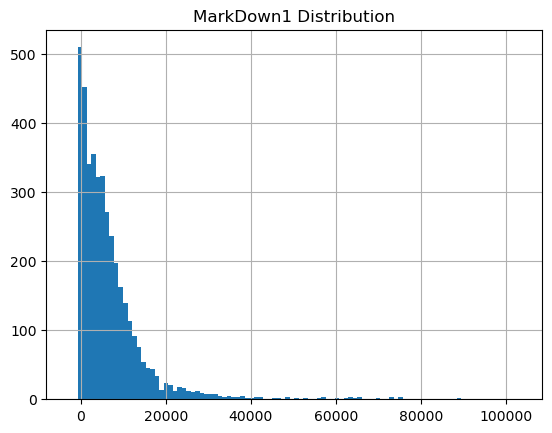

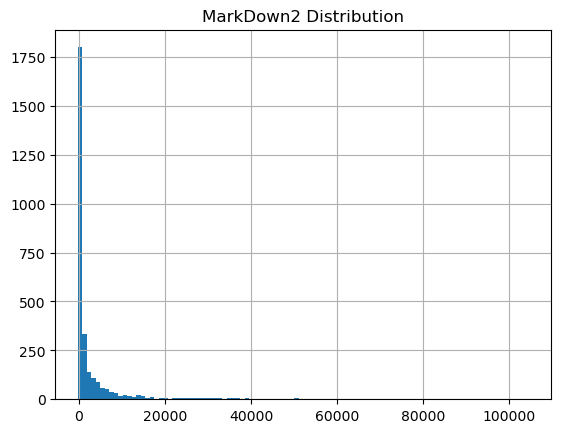

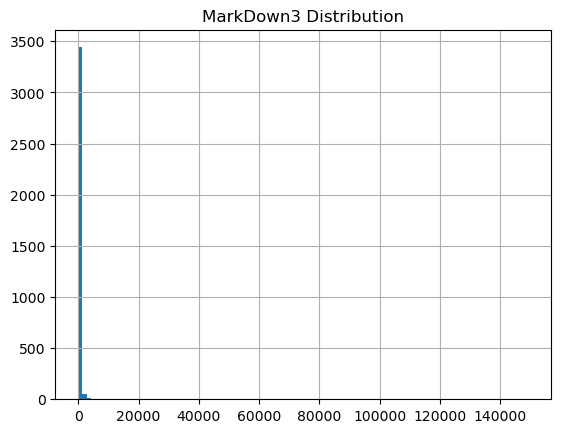

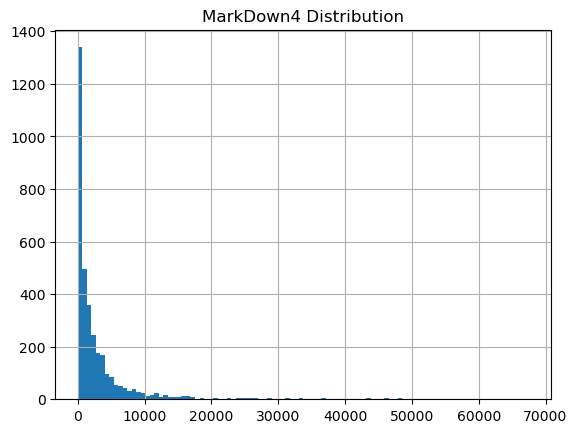

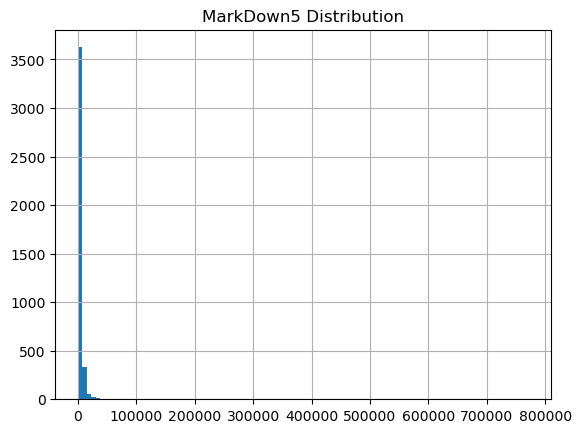

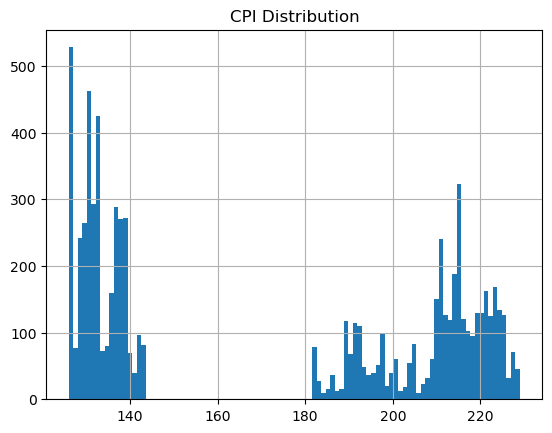

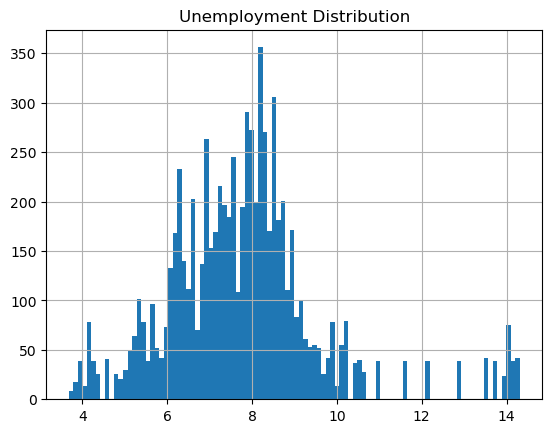

In [347]:
columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']

for col in columns:
    plt.hist(dataset_features[col],bins=100)
    plt.grid(True)
    plt.title(col+' Distribution')
    plt.show()

#### Calculating the number of columns in which all the values of are null for the markdown columns

In [348]:
dataset_features[(dataset_features['MarkDown1'].isna()) &(dataset_features['MarkDown2'].isna())&(dataset_features['MarkDown3'].isna())&(dataset_features['MarkDown4'].isna())&(dataset_features['MarkDown5'].isna())].shape

(4140, 12)

#### Lets sum it up to remove the null values and default them to 0

In [349]:
markdown_cols=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
dataset_features['TotalMarkDown']=dataset_features[markdown_cols].sum(axis=1)
dataset_features['TotalMarkDown']

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
          ...   
8185    11439.98
8186    19254.20
8187     8598.17
8188     5635.21
8189     2941.26
Name: TotalMarkDown, Length: 8190, dtype: float64

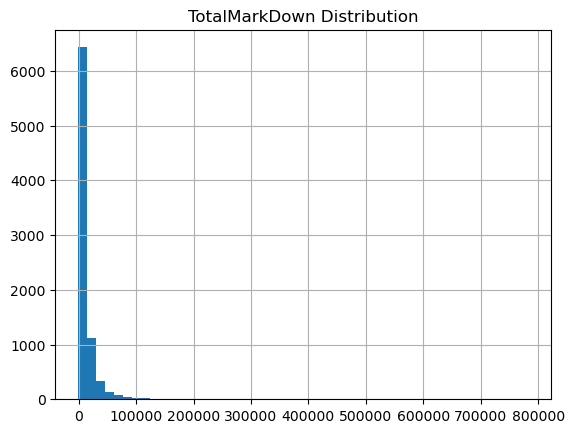

In [350]:
plt.hist(dataset_features['TotalMarkDown'],bins=50)
plt.grid(True)
plt.title('TotalMarkDown Distribution')
plt.show()

In [351]:
dataset_features.drop(columns=markdown_cols,inplace=True)

In [352]:
dataset_features.head()

Store        Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1  2010-02-05        42.31       2.572  211.096358         8.106   
1      1  2010-02-12        38.51       2.548  211.242170         8.106   
2      1  2010-02-19        39.93       2.514  211.289143         8.106   
3      1  2010-02-26        46.63       2.561  211.319643         8.106   
4      1  2010-03-05        46.50       2.625  211.350143         8.106   

   IsHoliday  TotalMarkDown  
0      False            0.0  
1       True            0.0  
2      False            0.0  
3      False            0.0  
4      False            0.0

##### Lets visualize the Temperature cycles for each store

In [353]:
temperature_df=dataset_features.copy()[['Store','Date','Temperature']]
temperature_df.head()

Store        Date  Temperature
0      1  2010-02-05        42.31
1      1  2010-02-12        38.51
2      1  2010-02-19        39.93
3      1  2010-02-26        46.63
4      1  2010-03-05        46.50

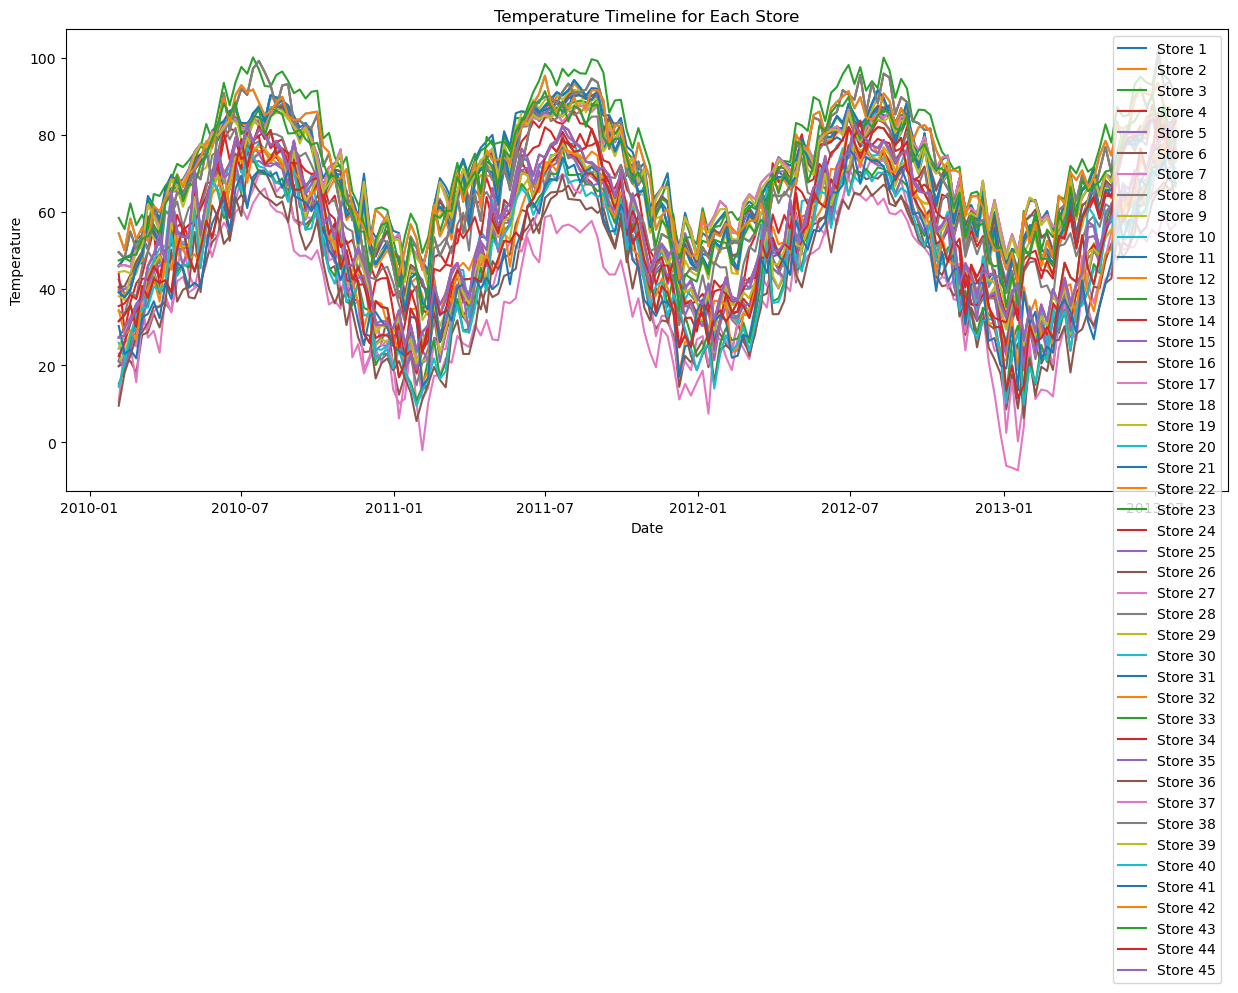

In [354]:
import matplotlib.pyplot as plt

temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])

temperature_df = temperature_df.sort_values(by=['Store', 'Date']).reset_index(drop=True)

stores = temperature_df['Store'].unique()

plt.figure(figsize=(15, 6))
for store_id in stores:
    store_data = temperature_df[temperature_df['Store'] == store_id]
    plt.plot(store_data['Date'], store_data['Temperature'], label=f'Store {store_id}')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Timeline for Each Store')
plt.legend()
plt.show()


#### Now lets visualize the fuel prices for each store in respect to date as a timeline

In [355]:
fuel_df=dataset_features.copy()[['Store','Date','Fuel_Price']]
fuel_df.head()

Store        Date  Fuel_Price
0      1  2010-02-05       2.572
1      1  2010-02-12       2.548
2      1  2010-02-19       2.514
3      1  2010-02-26       2.561
4      1  2010-03-05       2.625

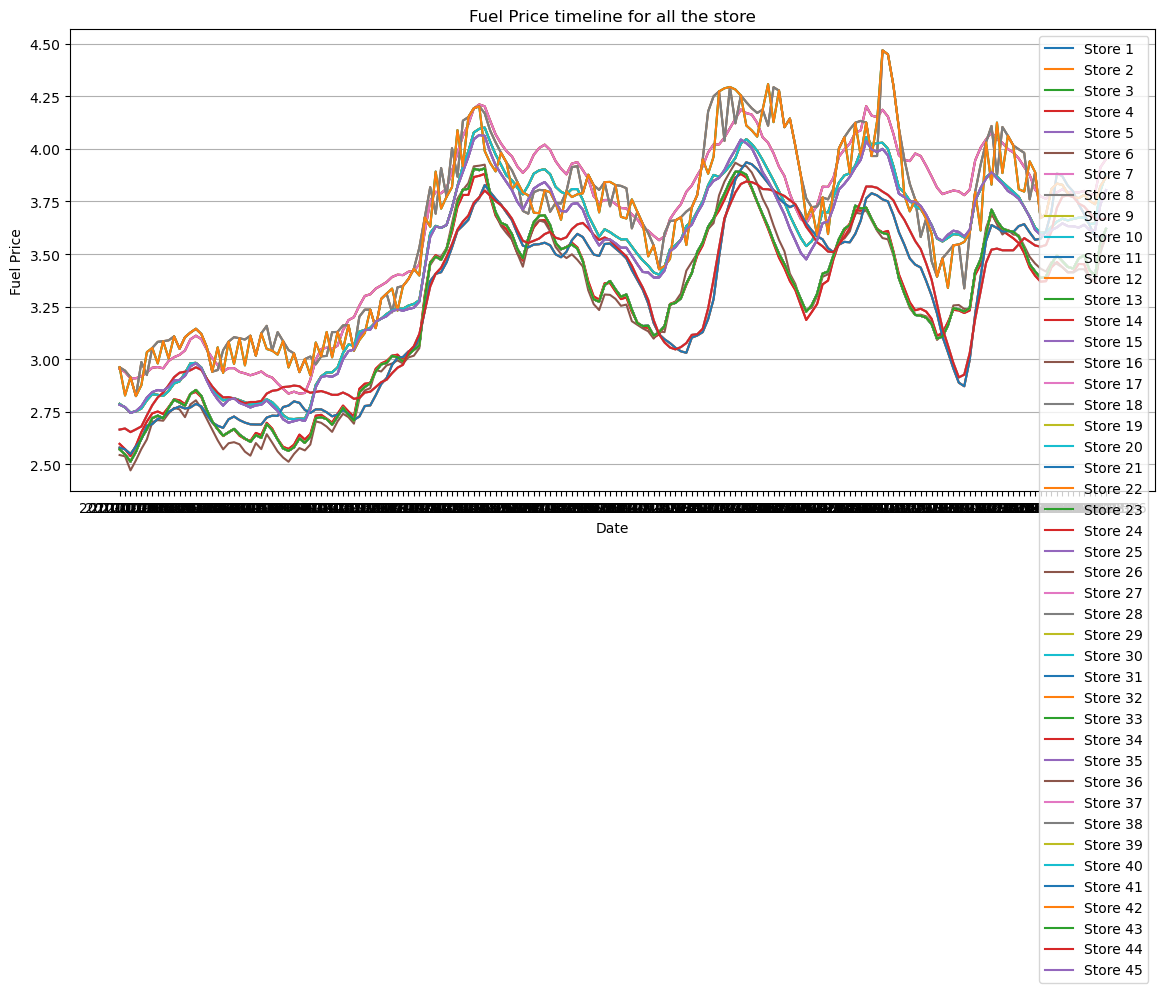

In [356]:
fuel_df=fuel_df.sort_values(by=['Store','Date']).reset_index(drop=True)

plt.figure(figsize=(14,6))
for store_id in fuel_df['Store'].unique():
    store_data = fuel_df[fuel_df['Store'] == store_id]
    plt.plot(store_data['Date'], store_data['Fuel_Price'], label=f'Store {store_id}')

plt.title("Fuel Price timeline for all the store")
plt.ylabel("Fuel Price")
plt.xlabel("Date")
plt.grid(axis='y')
plt.legend()
plt.show()

#### There is a sudden gap appearing the histogram of CPI feature column. Lets create a time line with Date to see if it is a data collection error

In [357]:
dataset_features['Date']=pd.to_datetime(dataset_features['Date'])
dataset_features=dataset_features.sort_values('Date')

C:\Windows\Temp\ipykernel_16520\3252942230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Date'] = pd.to_datetime(df_plot['Date'])


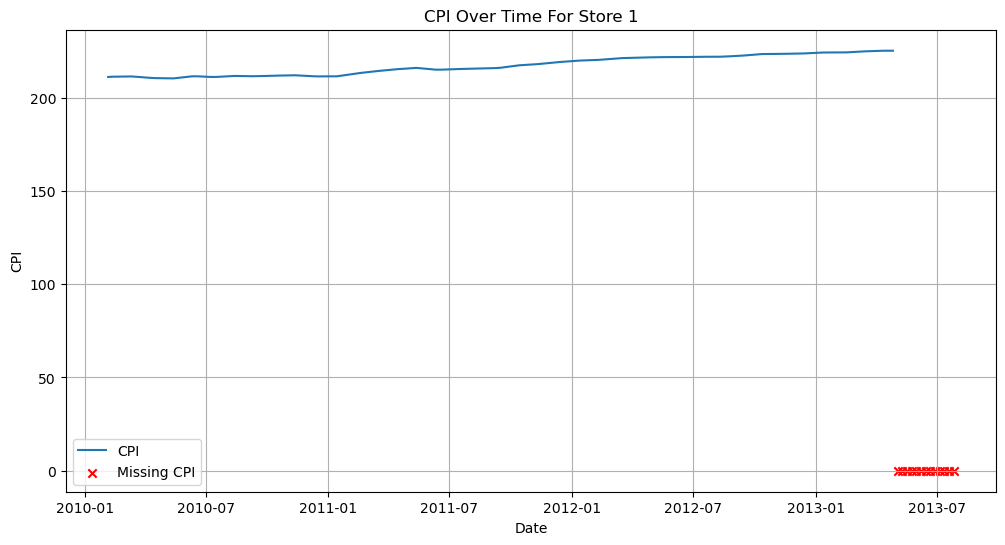

C:\Windows\Temp\ipykernel_16520\3252942230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Date'] = pd.to_datetime(df_plot['Date'])


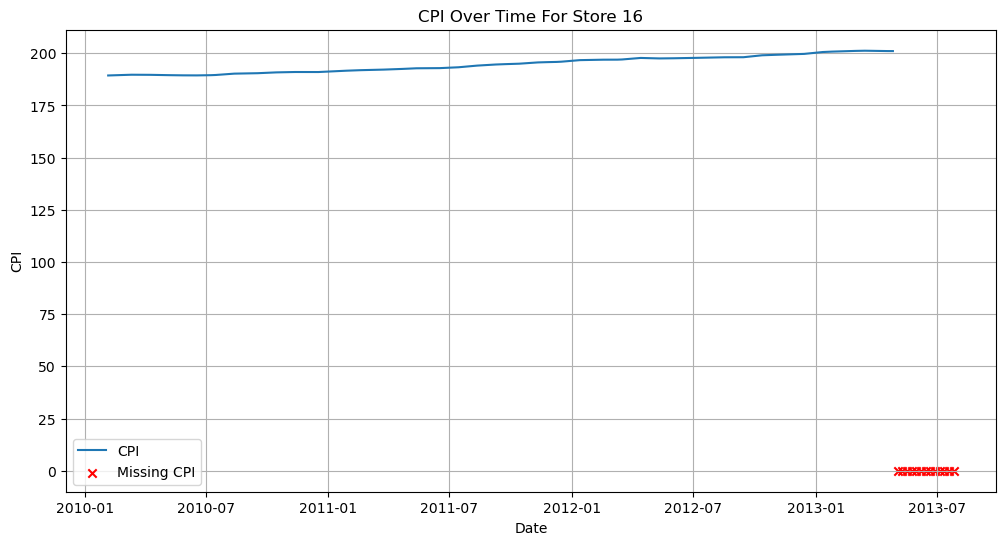

C:\Windows\Temp\ipykernel_16520\3252942230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Date'] = pd.to_datetime(df_plot['Date'])


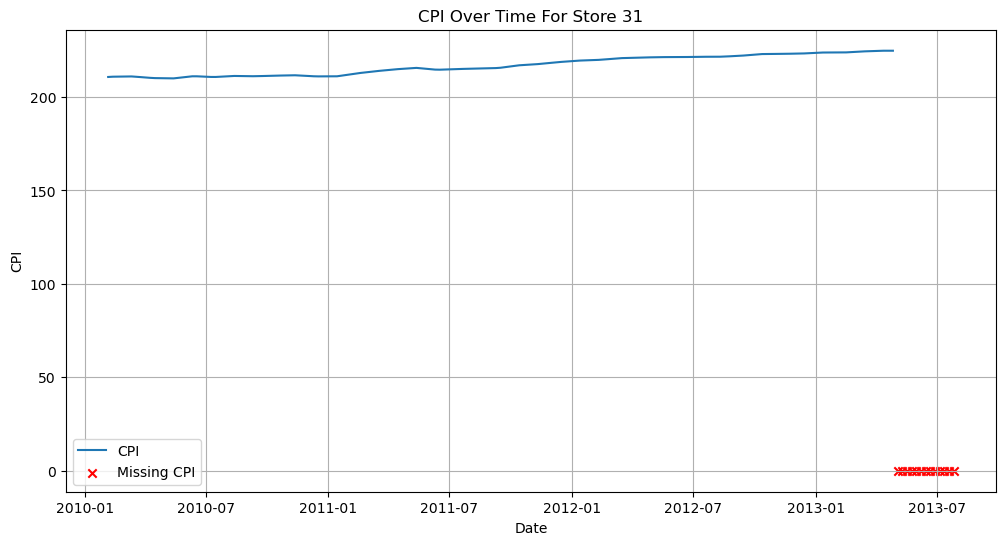

C:\Windows\Temp\ipykernel_16520\3252942230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Date'] = pd.to_datetime(df_plot['Date'])


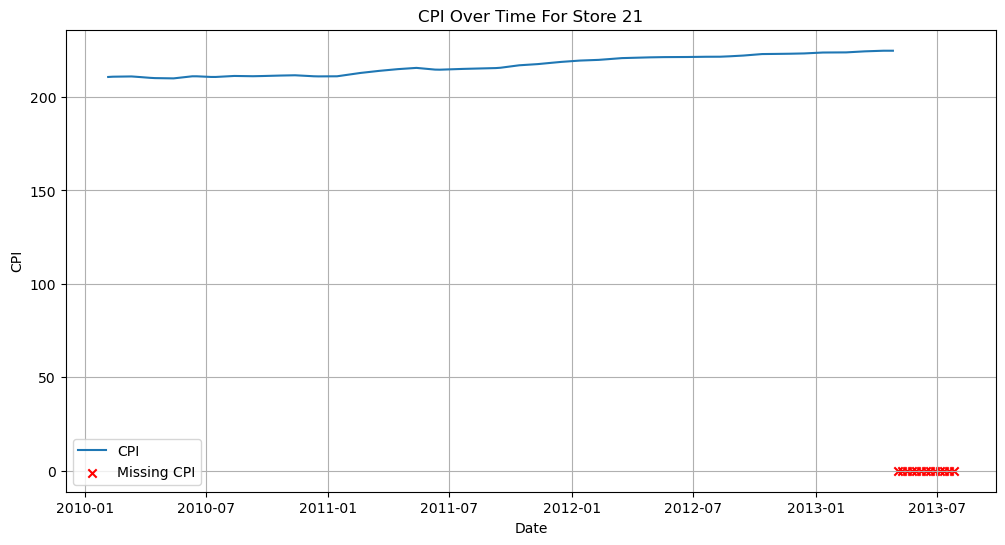

C:\Windows\Temp\ipykernel_16520\3252942230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Date'] = pd.to_datetime(df_plot['Date'])


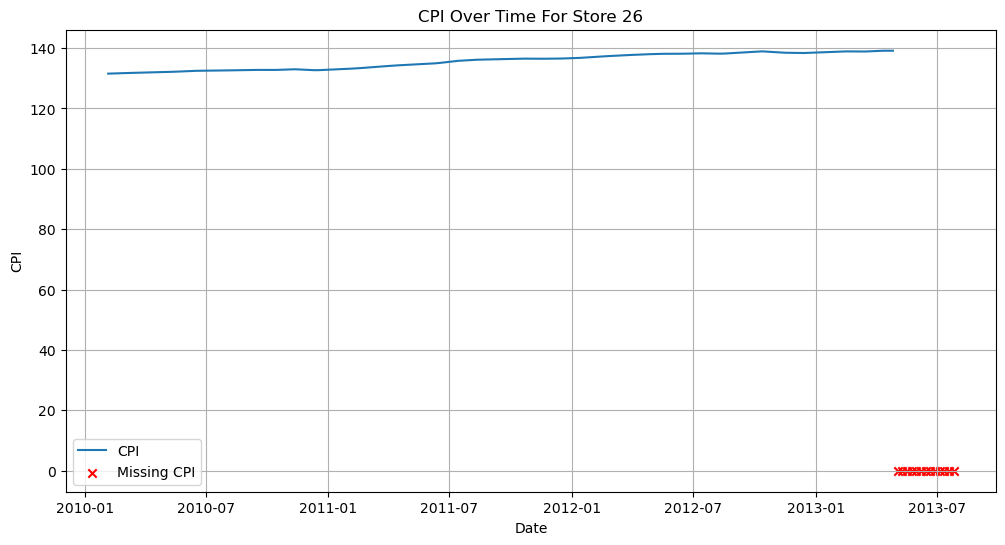

In [358]:
store_unique_values = dataset_features['Store'].unique()
cpi_missing_range_dict=dict({})

for val in store_unique_values[:5]:
    df_plot = dataset_features[dataset_features['Store'] == val]
    df_plot['Date'] = pd.to_datetime(df_plot['Date'])
    
    df_valid = df_plot[df_plot['CPI'].notna()]
    df_missing = df_plot[df_plot['CPI'].isna()]
    cpi_missing_range_dict[val]=(df_missing['Date'].min(),df_missing['Date'].max(),df_missing.shape[0])
    
    plt.figure(figsize=(12,6))
    plt.plot(df_valid['Date'], df_valid['CPI'], label='CPI')
    plt.scatter(df_missing['Date'], [0]*len(df_missing), color='red', label='Missing CPI', marker='x')
    
    plt.title(f'CPI Over Time For Store {val}')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.grid(True)
    plt.show()

In [359]:
df = pd.DataFrame.from_dict(dict(sorted(cpi_missing_range_dict.items())), orient='index')
print(df)

            0          1   2
1  2013-05-03 2013-07-26  13
16 2013-05-03 2013-07-26  13
21 2013-05-03 2013-07-26  13
26 2013-05-03 2013-07-26  13
31 2013-05-03 2013-07-26  13


In [360]:
13*45

585

#### We checked that there happens to be 3 categories of Type of Stores also in the histogram of Size feature column there happens to be 3 seperate distribution. Probably these 2 features can help in predicting the proper values of CPI as we observed that there are 3 startign points of CPI (between 120 to 140, 175 to 200 and between 200 and 220)

#### Lets create the dataset for training a suitable model to predict the values of CPI

In [361]:
dataset_stores=pd.read_csv('../data/raw/stores.csv')
dataset_stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [362]:
temp_df=dataset_features.copy()
temp_stores_df=dataset_stores.copy()
features_stores_merged_df=pd.merge(temp_df,temp_stores_df,how='left',on='Store')
features_stores_merged_df=features_stores_merged_df.sort_values(by=['Store','Date']).reset_index(drop=True)
features_stores_merged_df.head()

Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1 2010-02-05        42.31       2.572  211.096358         8.106   
1      1 2010-02-12        38.51       2.548  211.242170         8.106   
2      1 2010-02-19        39.93       2.514  211.289143         8.106   
3      1 2010-02-26        46.63       2.561  211.319643         8.106   
4      1 2010-03-05        46.50       2.625  211.350143         8.106   

   IsHoliday  TotalMarkDown Type    Size  
0      False            0.0    A  151315  
1       True            0.0    A  151315  
2      False            0.0    A  151315  
3      False            0.0    A  151315  
4      False            0.0    A  151315

In [363]:
features_stores_merged_df.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
CPI              585
Unemployment     585
IsHoliday          0
TotalMarkDown      0
Type               0
Size               0
dtype: int64

In [364]:
cpi_prediction_df=features_stores_merged_df.drop(columns=['Temperature','Fuel_Price','Unemployment','IsHoliday','TotalMarkDown'])
cpi_prediction_df.head()

Store       Date         CPI Type    Size
0      1 2010-02-05  211.096358    A  151315
1      1 2010-02-12  211.242170    A  151315
2      1 2010-02-19  211.289143    A  151315
3      1 2010-02-26  211.319643    A  151315
4      1 2010-03-05  211.350143    A  151315

In [365]:
cols = [col for col in cpi_prediction_df.columns if col != 'CPI'] + ['CPI']
cpi_prediction_df = cpi_prediction_df[cols]
cpi_prediction_df=cpi_prediction_df.sort_values(by=['Store','Date']).reset_index(drop=True)
cpi_prediction_df.head()

Store       Date Type    Size         CPI
0      1 2010-02-05    A  151315  211.096358
1      1 2010-02-12    A  151315  211.242170
2      1 2010-02-19    A  151315  211.289143
3      1 2010-02-26    A  151315  211.319643
4      1 2010-03-05    A  151315  211.350143

#### Our dataset is nearly ready but depending on the candidate models, the dataset structure might change. Here now to impute the values for CPI we are going to use 1) Linear interpolations 2) ARIMA model 3)Polynomial Regression Model 4) RNN and eventually 5)LSTM (overkill perhaps)

In [366]:
cpi_prediction_df['CPI_imputed_linear'] = (
    cpi_prediction_df.groupby("Store")['CPI']
      .transform(lambda x: x.interpolate(method="linear").ffill().bfill())
)

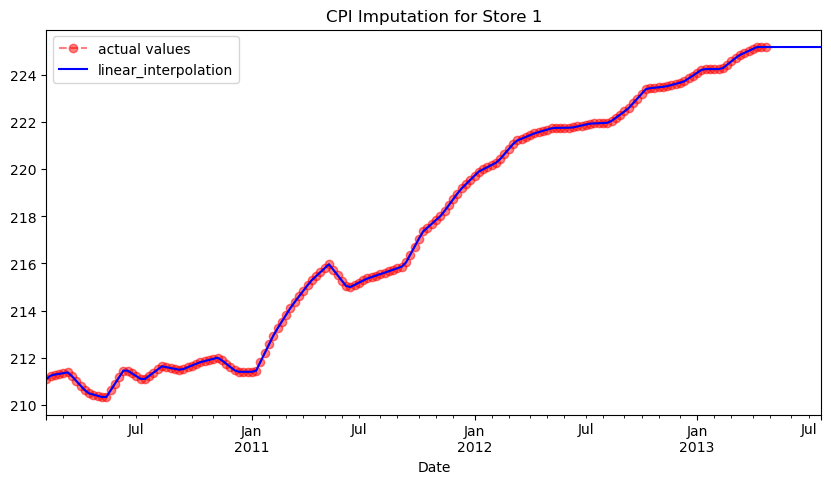

In [367]:
store_id = 1
subset = cpi_prediction_df[cpi_prediction_df['Store'] == store_id].set_index('Date')

plt.figure(figsize=(10,5))
subset['CPI'].plot(title=f'CPI Imputation for Store {store_id}',color='red',linestyle='--',marker='o',label='actual values',alpha=0.5)
subset['CPI_imputed_linear'].plot(color='blue',label='linear_interpolation')
plt.legend()
plt.show()

In [368]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

cpi_prediction_df['CPI_imputed_arima'] = np.nan

for store_id in cpi_prediction_df['Store'].unique()[:5]:
    store_df = cpi_prediction_df[cpi_prediction_df['Store'] == store_id].sort_values('Date')
    ts = store_df['CPI']

    try:
        ts_filled = ts.ffill().bfill()
        p = min(16, len(ts_filled)-1)  # avoid p > series length
        model = ARIMA(ts_filled, order=(p,0,0))
        arima_result = model.fit()

        pred_series = pd.Series(arima_result.predict(start=0, end=len(ts_filled)-1, typ='levels'), index=ts.index)
        mask = ts.isna()
        cpi_prediction_df.loc[(cpi_prediction_df['Store']==store_id) & mask, 'CPI_imputed_arima'] = pred_series[mask]

    except Exception as e:
        print(f"ARIMA failed for Store {store_id}: {e}")


c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsuppor

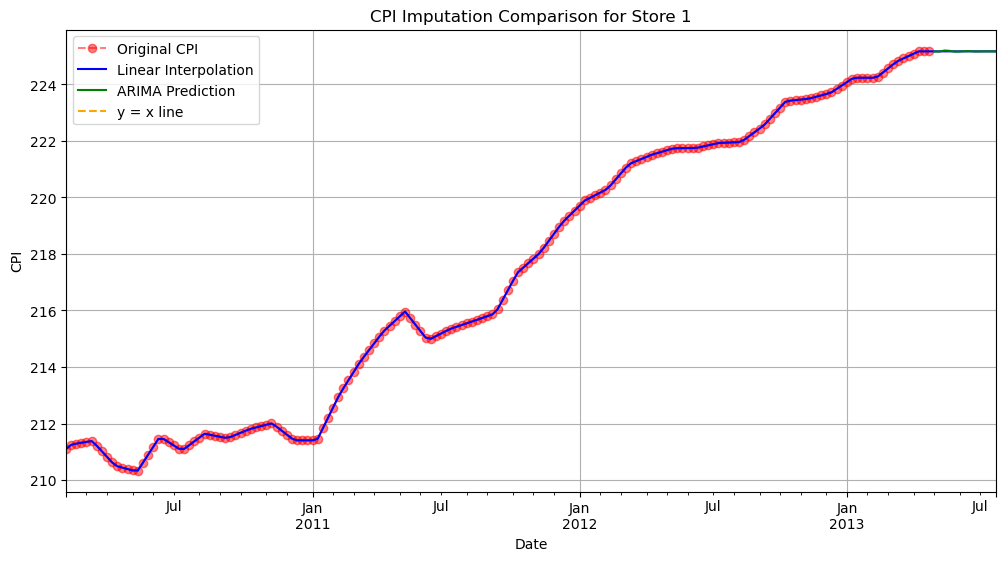

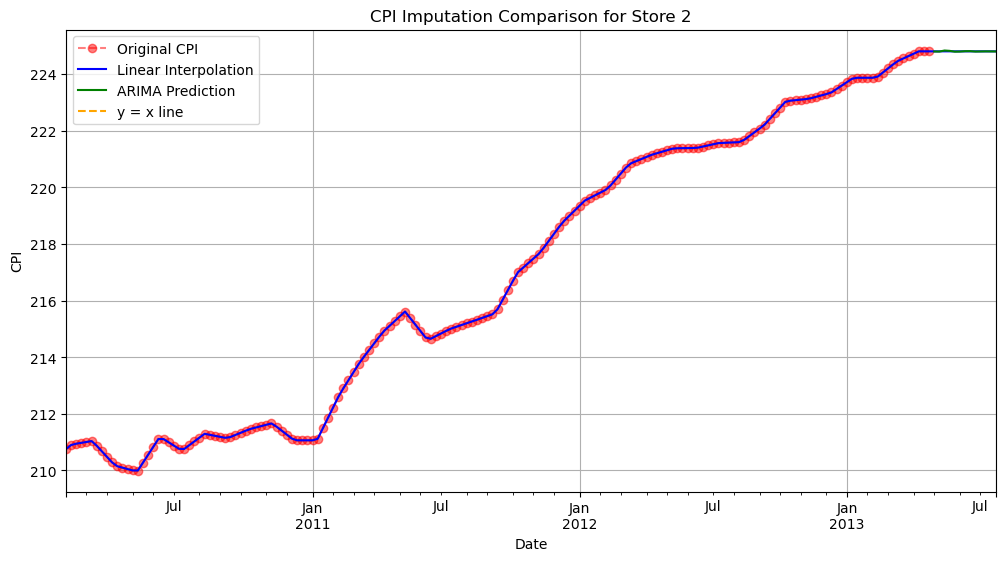

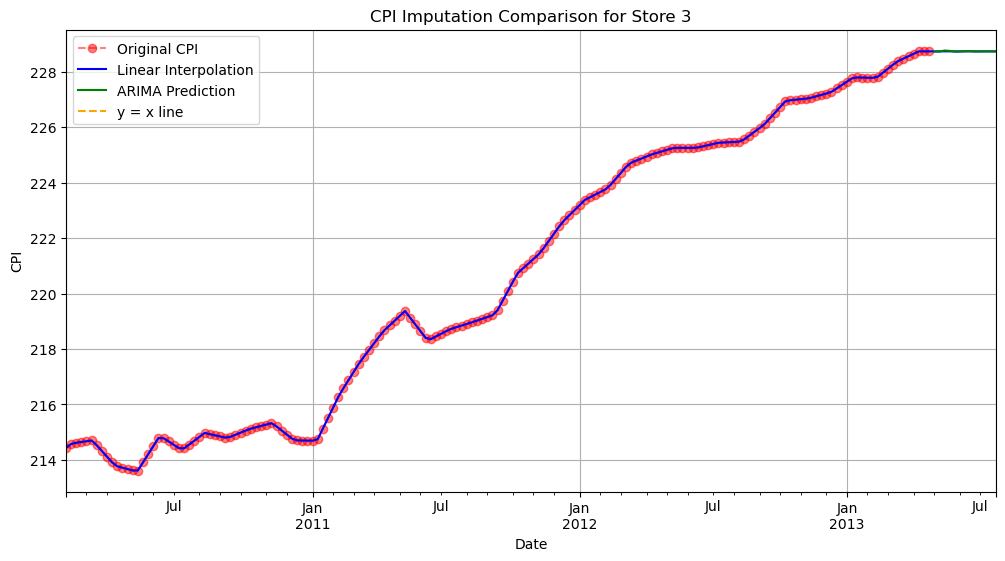

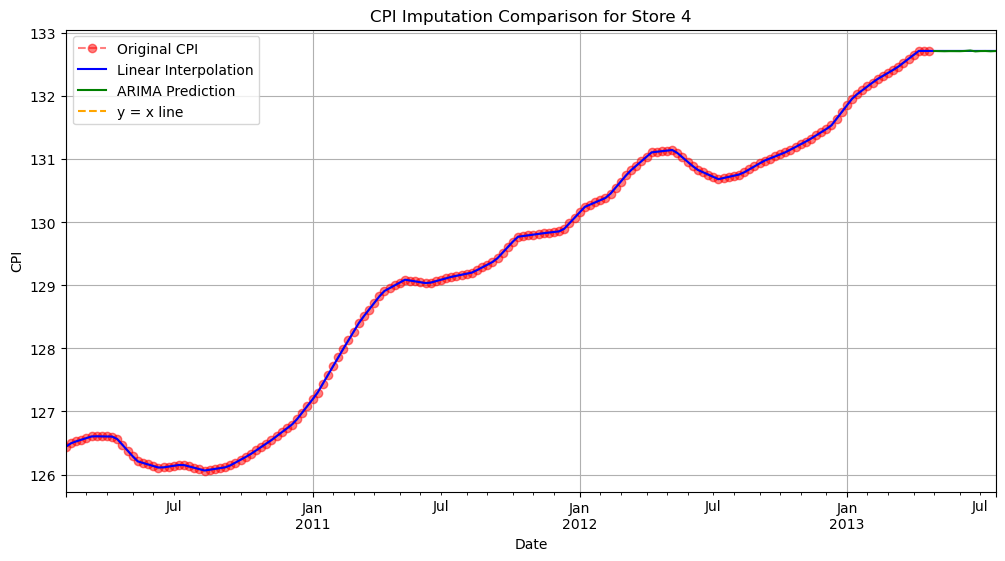

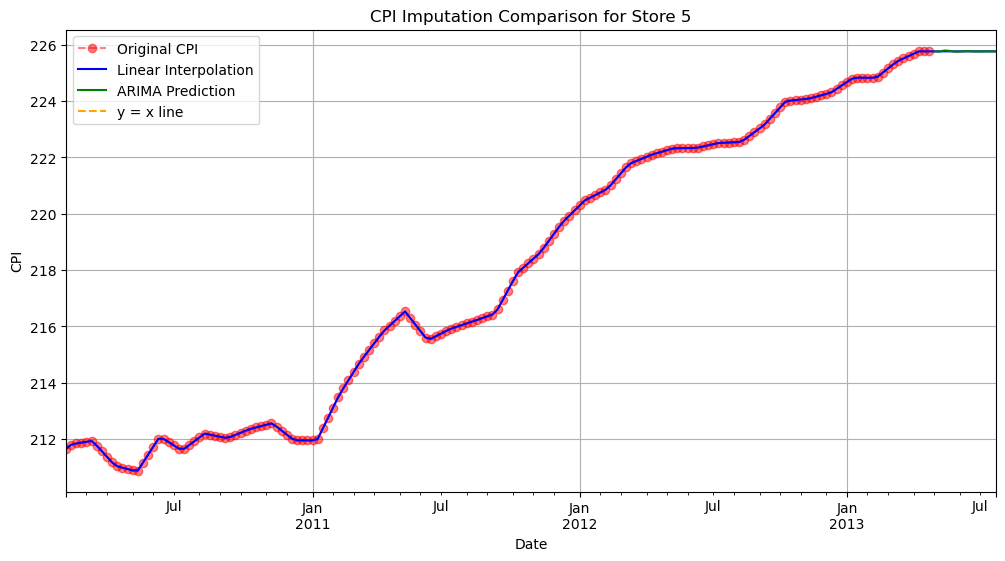

In [369]:
import matplotlib.pyplot as plt
import numpy as np

store_ids = sorted(cpi_prediction_df['Store'].unique()[:5])

for store_id in store_ids:
    subset = cpi_prediction_df[cpi_prediction_df['Store'] == store_id].sort_values('Date')
    subset = subset.set_index('Date')

    plt.figure(figsize=(12,6))
    
    subset['CPI'].plot(label='Original CPI', color='red', linestyle='--', marker='o', alpha=0.5)
    subset['CPI_imputed_linear'].plot(label='Linear Interpolation', color='blue')
    subset['CPI_imputed_arima'].plot(label='ARIMA Prediction', color='green')
    
    x_line = np.arange(len(subset))
    y_line = np.linspace(subset['CPI'].min(), subset['CPI'].max(), len(subset))
    plt.plot(x_line, y_line, label='y = x line', color='orange', linestyle='--')
    
    plt.title(f'CPI Imputation Comparison for Store {store_id}')
    plt.xlabel("Date")
    plt.ylabel("CPI")
    plt.legend()
    plt.grid(True)
    plt.show()


#### Now lets try the polynomial linear regression model for the predictions

In [370]:
cpi_prediction_df['CPI_imputed_poly'] = np.nan
cpi_prediction_df.head()

Store       Date Type    Size         CPI  CPI_imputed_linear  \
0      1 2010-02-05    A  151315  211.096358          211.096358   
1      1 2010-02-12    A  151315  211.242170          211.242170   
2      1 2010-02-19    A  151315  211.289143          211.289143   
3      1 2010-02-26    A  151315  211.319643          211.319643   
4      1 2010-03-05    A  151315  211.350143          211.350143   

   CPI_imputed_arima  CPI_imputed_poly  
0                NaN               NaN  
1                NaN               NaN  
2                NaN               NaN  
3                NaN               NaN  
4                NaN               NaN

#### Before doing the imputation, lets check the CPI value trend of the store depending on the type of the store they are

In [371]:
store_type_map = cpi_prediction_df[['Store', 'Type']].drop_duplicates().set_index('Store')['Type'].to_dict()
store_type_map

{1: 'A',
 2: 'A',
 3: 'B',
 4: 'A',
 5: 'B',
 6: 'A',
 7: 'B',
 8: 'A',
 9: 'B',
 10: 'B',
 11: 'A',
 12: 'B',
 13: 'A',
 14: 'A',
 15: 'B',
 16: 'B',
 17: 'B',
 18: 'B',
 19: 'A',
 20: 'A',
 21: 'B',
 22: 'B',
 23: 'B',
 24: 'A',
 25: 'B',
 26: 'A',
 27: 'A',
 28: 'A',
 29: 'B',
 30: 'C',
 31: 'A',
 32: 'A',
 33: 'A',
 34: 'A',
 35: 'B',
 36: 'A',
 37: 'C',
 38: 'C',
 39: 'A',
 40: 'A',
 41: 'A',
 42: 'C',
 43: 'C',
 44: 'C',
 45: 'B'}

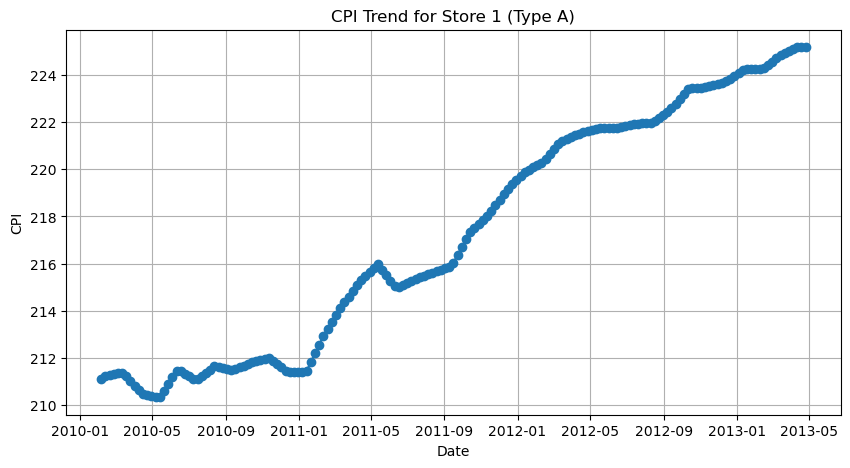

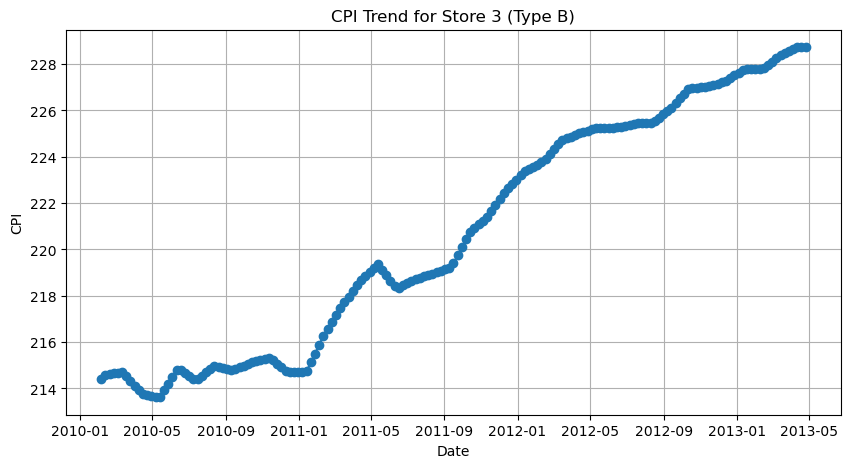

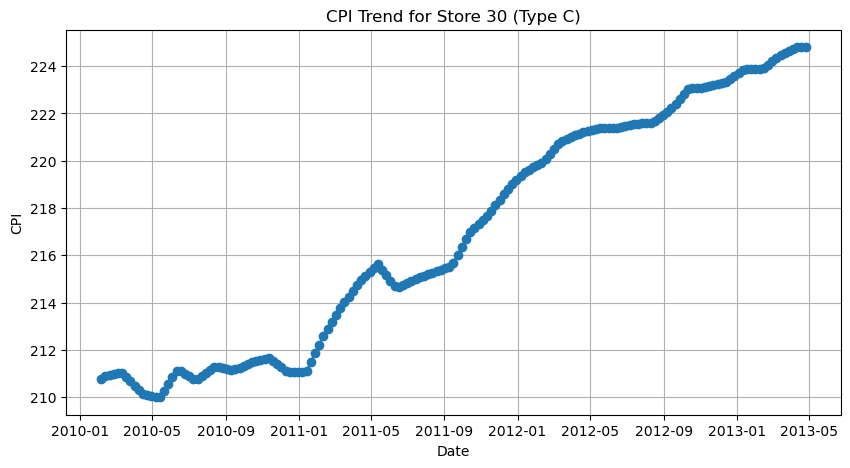

In [372]:
import matplotlib.pyplot as plt
type_uniques=cpi_prediction_df['Type'].unique()

for t in type_uniques:
    store_id=-1
    if t=='A':
        store_id=1
    elif t=='B':
        store_id=3
    else:
        store_id=30
    subset_df=cpi_prediction_df[(cpi_prediction_df['Type']==t) & (cpi_prediction_df['Store']==store_id)].sort_values(by=['Date']).reset_index(drop=True)


    plt.figure(figsize=(10, 5))
    plt.plot(subset_df['Date'], subset_df['CPI'], marker='o', linestyle='-')
    plt.title(f'CPI Trend for Store {store_id} (Type {t})')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.grid(True)
    plt.show()


#### The trend for CPI looks the same for all the type values of Type feature column

#### Lets try if the Size feature column can help us in this

In [373]:
len(cpi_prediction_df['Size'].unique())
size_counts = cpi_prediction_df['Size'].value_counts()
print(size_counts)

Size
39690     546
39910     546
203819    364
151315    182
34875     182
202307    182
37392     182
205863    182
155078    182
70713     182
202505    182
125833    182
219622    182
200898    182
207499    182
126512    182
57197     182
93188     182
120653    182
203742    182
140167    182
119557    182
123737    182
112238    182
128107    182
114533    182
206302    182
152513    182
93638     182
42988     182
203750    182
204184    182
203007    182
158114    182
103681    182
184109    182
155083    182
196321    182
41062     182
118221    182
Name: count, dtype: int64


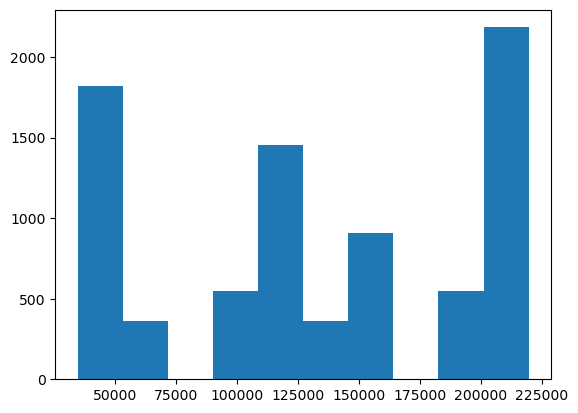

In [374]:
plt.hist(cpi_prediction_df['Size'])
plt.show()

#### Lets try bucketing Size for CPI prediction to check if it helps

In [375]:
import pandas as pd

bucket_edges = [0, 75000, 175000, cpi_prediction_df['Size'].max()+1]  # +1 ensures max value is included
bucket_labels = ['Small', 'Medium', 'Large']

cpi_prediction_df['Size_bucket'] = pd.cut(cpi_prediction_df['Size'], bins=bucket_edges, labels=bucket_labels, include_lowest=True)
cpi_prediction_df.head()

Store       Date Type    Size         CPI  CPI_imputed_linear  \
0      1 2010-02-05    A  151315  211.096358          211.096358   
1      1 2010-02-12    A  151315  211.242170          211.242170   
2      1 2010-02-19    A  151315  211.289143          211.289143   
3      1 2010-02-26    A  151315  211.319643          211.319643   
4      1 2010-03-05    A  151315  211.350143          211.350143   

   CPI_imputed_arima  CPI_imputed_poly Size_bucket  
0                NaN               NaN      Medium  
1                NaN               NaN      Medium  
2                NaN               NaN      Medium  
3                NaN               NaN      Medium  
4                NaN               NaN      Medium

#### Now lets check if this bucket process helped us or not

In [376]:
# Option 1: If Size is static per store
store_size_map = cpi_prediction_df[['Store', 'Size_bucket']].drop_duplicates().set_index('Store')['Size_bucket'].to_dict()
print(store_size_map)

{1: 'Medium', 2: 'Large', 3: 'Small', 4: 'Large', 5: 'Small', 6: 'Large', 7: 'Small', 8: 'Medium', 9: 'Medium', 10: 'Medium', 11: 'Large', 12: 'Medium', 13: 'Large', 14: 'Large', 15: 'Medium', 16: 'Small', 17: 'Medium', 18: 'Medium', 19: 'Large', 20: 'Large', 21: 'Medium', 22: 'Medium', 23: 'Medium', 24: 'Large', 25: 'Medium', 26: 'Medium', 27: 'Large', 28: 'Large', 29: 'Medium', 30: 'Small', 31: 'Large', 32: 'Large', 33: 'Small', 34: 'Medium', 35: 'Medium', 36: 'Small', 37: 'Small', 38: 'Small', 39: 'Large', 40: 'Medium', 41: 'Large', 42: 'Small', 43: 'Small', 44: 'Small', 45: 'Medium'}


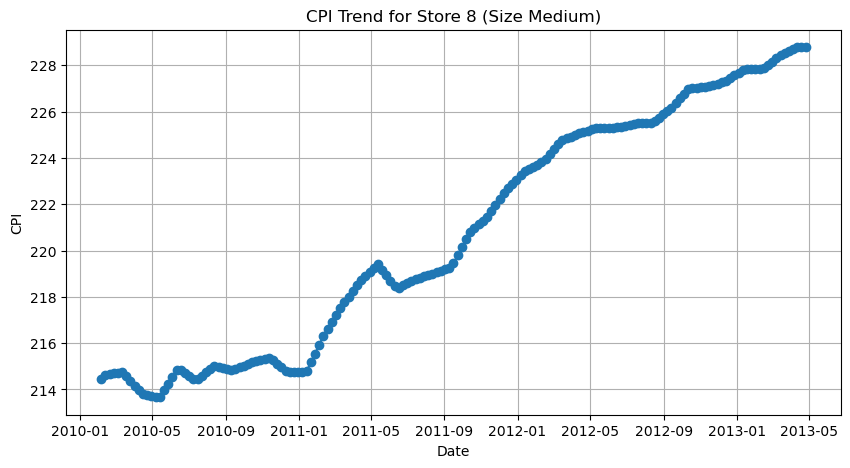

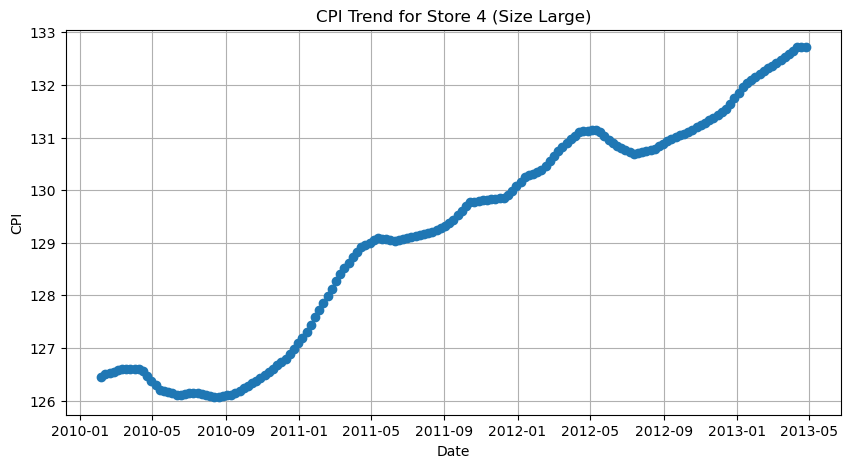

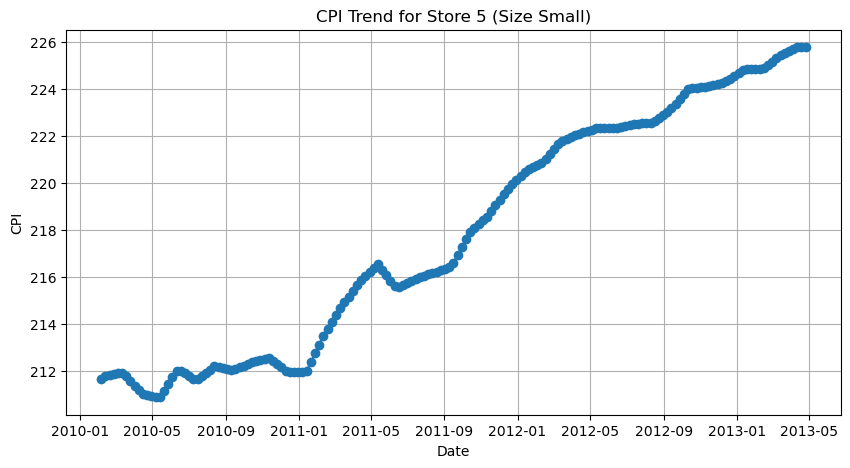

In [377]:
import matplotlib.pyplot as plt
size_types=cpi_prediction_df['Size_bucket'].unique()

for t in size_types:
    store_id=-1
    if t=='Small':
        store_id=5
    elif t=='Medium':
        store_id=8
    else:
        store_id=4
    subset_df=cpi_prediction_df[(cpi_prediction_df['Size_bucket']==t) & (cpi_prediction_df['Store']==store_id)].sort_values(by=['Date']).reset_index(drop=True)


    plt.figure(figsize=(10, 5))
    plt.plot(subset_df['Date'], subset_df['CPI'], marker='o', linestyle='-')
    plt.title(f'CPI Trend for Store {store_id} (Size {t})')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.grid(True)
    plt.show()


In [378]:
import pandas as pd
from scipy.stats import f_oneway, kruskal

cpi_small = cpi_prediction_df[cpi_prediction_df['Size_bucket']=='Small']['CPI']
cpi_medium = cpi_prediction_df[cpi_prediction_df['Size_bucket']=='Medium']['CPI']
cpi_large = cpi_prediction_df[cpi_prediction_df['Size_bucket']=='Large']['CPI']

store_mean_cpi = cpi_prediction_df.groupby(['Store','Size_bucket'])['CPI'].mean().reset_index()

from scipy.stats import kruskal
stat, p_value = kruskal(cpi_small, cpi_medium, cpi_large)
print(stat, p_value)


nan nan


C:\Windows\Temp\ipykernel_16520\647521347.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_mean_cpi = cpi_prediction_df.groupby(['Store','Size_bucket'])['CPI'].mean().reset_index()


In [379]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer

# Columns to use as features
numeric_features = ['Size']
categorical_features = ['Type']

# Preprocessing for features: standardize Size, one-hot encode Type
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ]
)

store_ids = sorted(cpi_prediction_df['Store'].unique())
alpha = 0.5
poly_degree = 4

for store_id in store_ids:
    # Filter store and sort by Date
    subset = cpi_prediction_df[cpi_prediction_df['Store'] == store_id].sort_values('Date')
    ts = subset['CPI'].values
    
    # Base time feature
    X_time = np.arange(len(ts)).reshape(-1,1)
    
    # Other features
    X_other = subset[numeric_features + categorical_features]
    
    # Preprocess features
    X_other_processed = preprocessor.fit_transform(X_other)
    
    # Combine time + processed features
    X_full = np.hstack([X_time, X_other_processed])
    
    # Mask for non-NaN CPI values
    mask = ~np.isnan(ts)
    
    # Standardize CPI target
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(ts[mask].reshape(-1,1)).ravel()
    
    # Polynomial features only on numeric columns (Time + Size)
    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
    X_numeric_poly = poly.fit_transform(X_full[:, :len(numeric_features)+1])
    
    # Combine polynomial features + one-hot categorical
    X_poly_full = np.hstack([X_numeric_poly, X_full[:, len(numeric_features)+1:]])
    
    # Fit Ridge regression
    model = Ridge(alpha=alpha)
    model.fit(X_poly_full[mask], y_train_scaled)
    
    # Predict for all rows
    y_pred_scaled = model.predict(X_poly_full)
    
    # Inverse-transform to original CPI scale
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()
    
    # Store imputed CPI
    cpi_prediction_df.loc[cpi_prediction_df['Store'] == store_id, 'CPI_imputed_poly'] = y_pred


c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=6.3715e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=6.3715e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=6.3715e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=6.3715e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", 

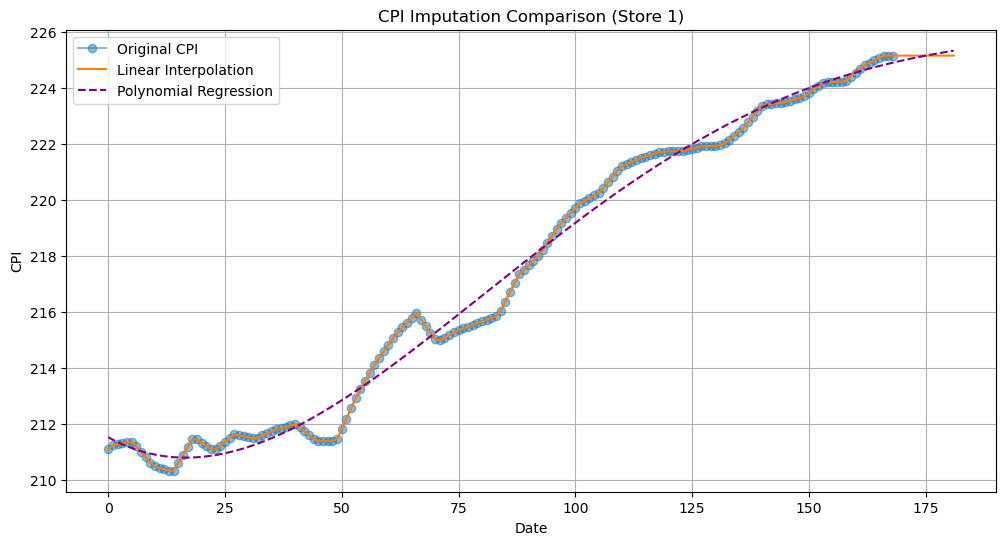

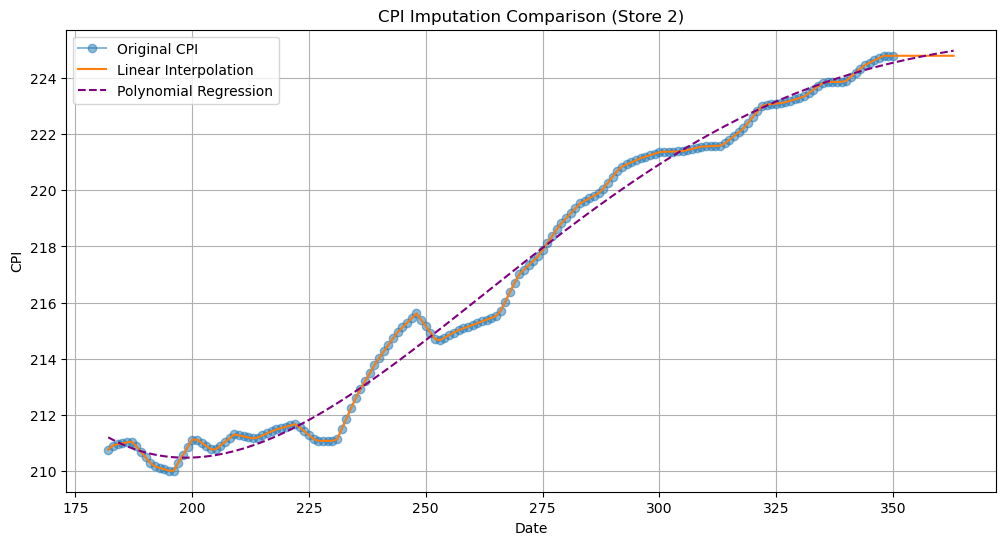

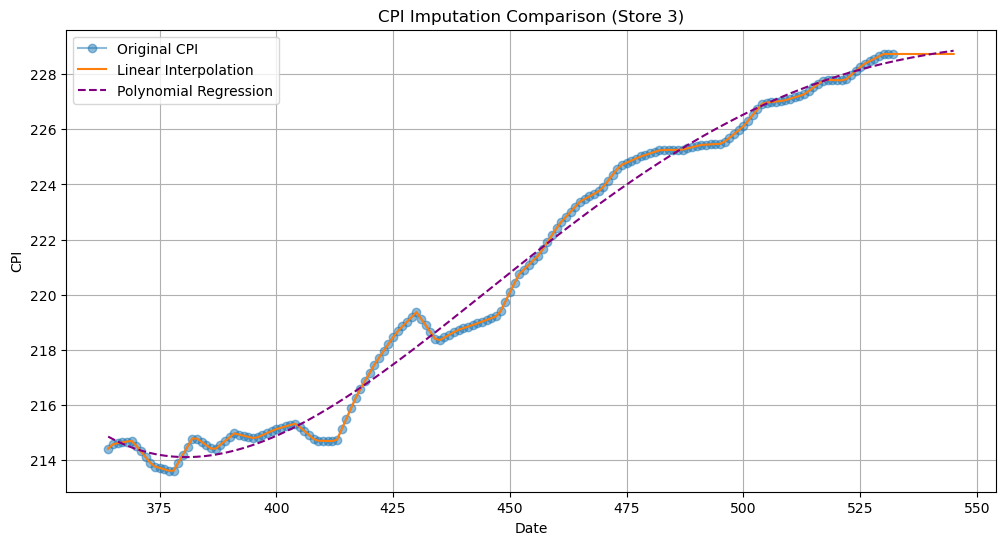

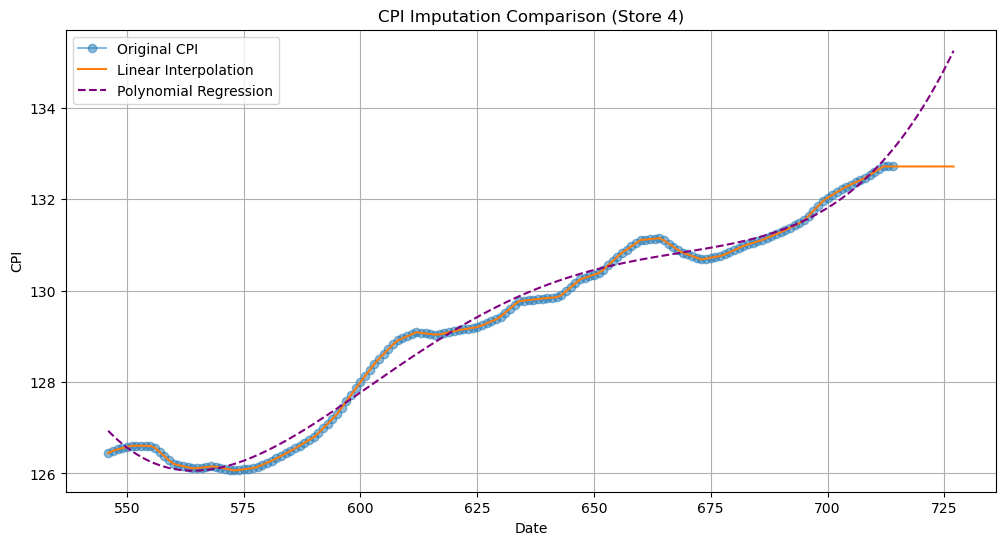

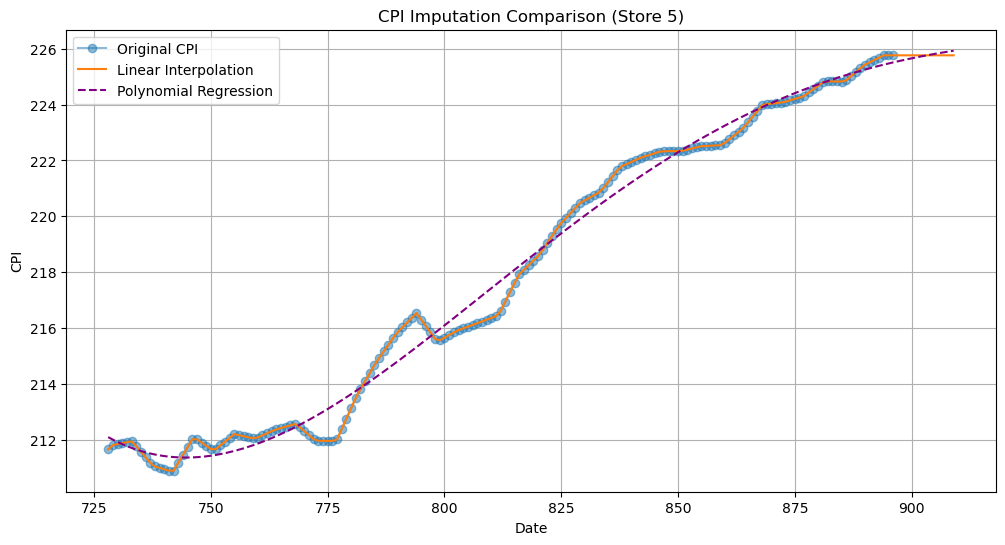

In [380]:
import matplotlib.pyplot as plt

store_ids=sorted(cpi_prediction_df['Store'].unique()[:5])
for store_id in store_ids:
    subset = cpi_prediction_df[cpi_prediction_df['Store'] == store_id].sort_values('Date')
    plt.figure(figsize=(12,6))
    subset['CPI'].plot(label='Original CPI', marker='o', alpha=0.5)
    subset['CPI_imputed_linear'].plot(label='Linear Interpolation')
    subset['CPI_imputed_poly'].plot(label='Polynomial Regression', color='purple', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.title(f'CPI Imputation Comparison (Store {store_id})')
    plt.legend()
    plt.grid(True)
    plt.show()

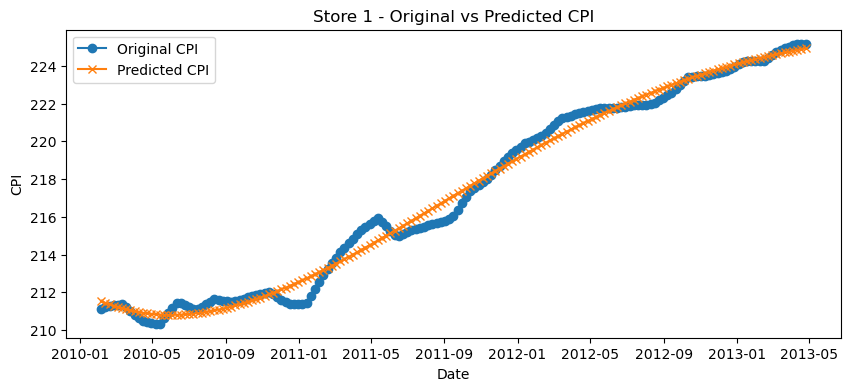

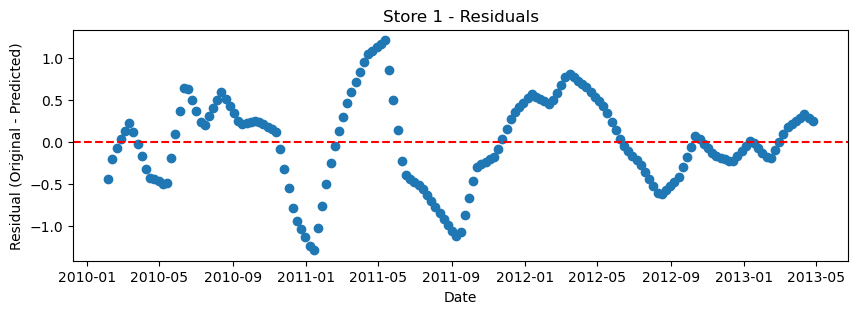

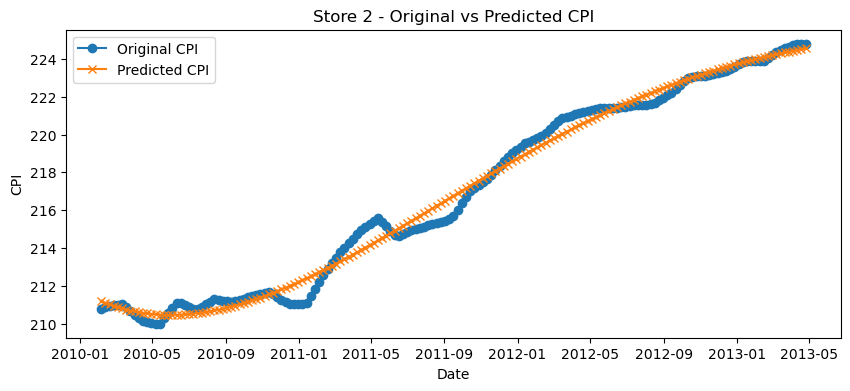

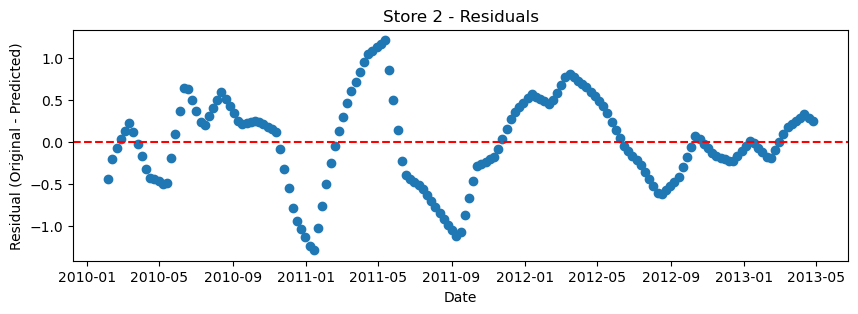

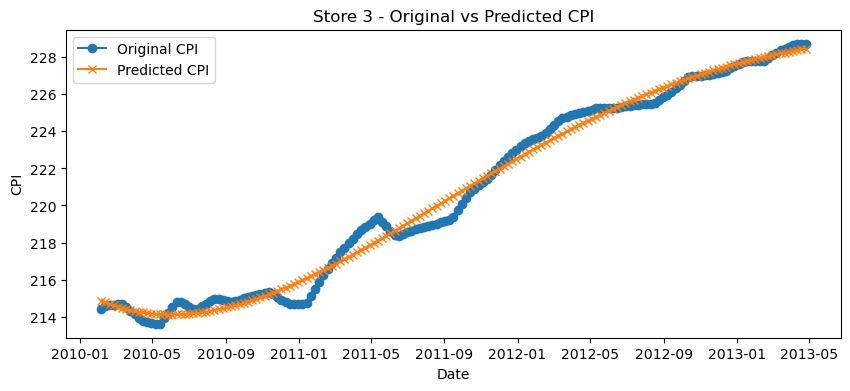

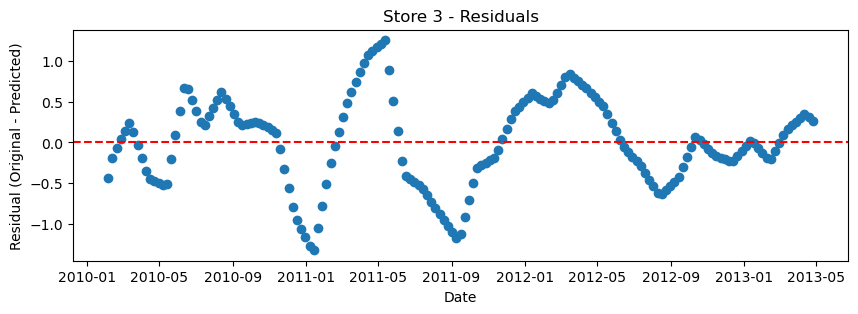

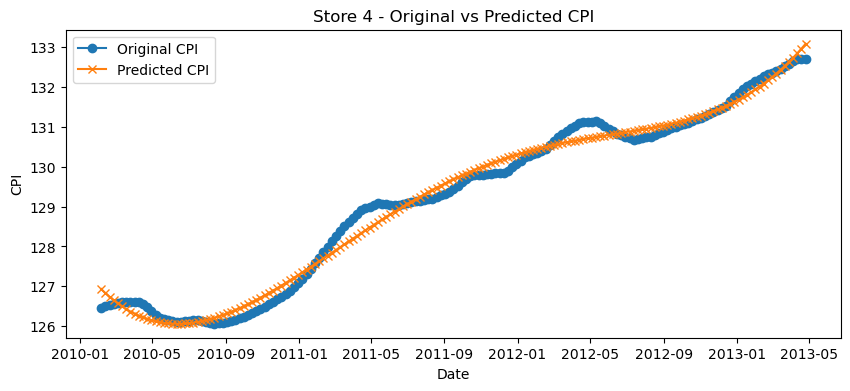

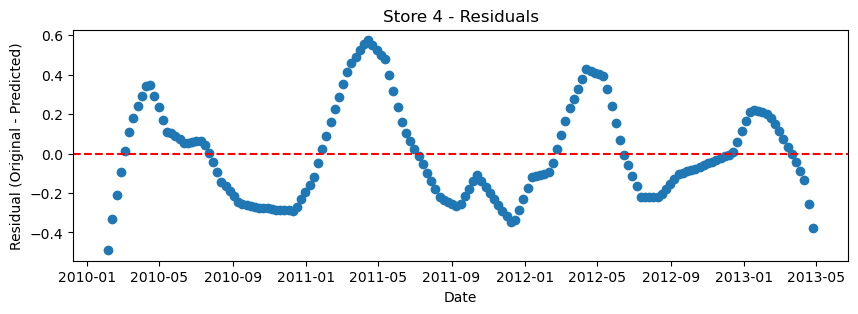

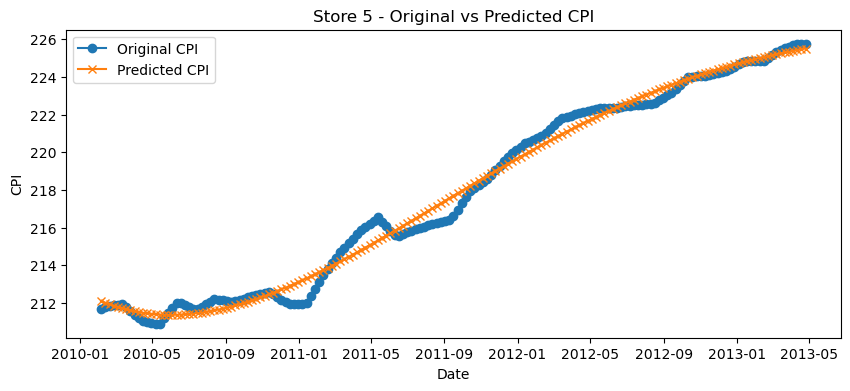

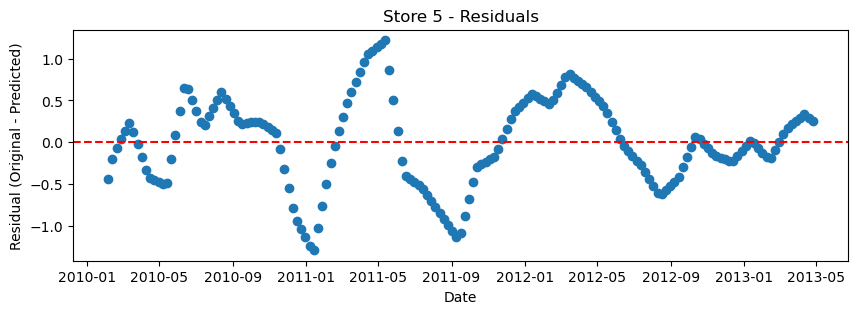

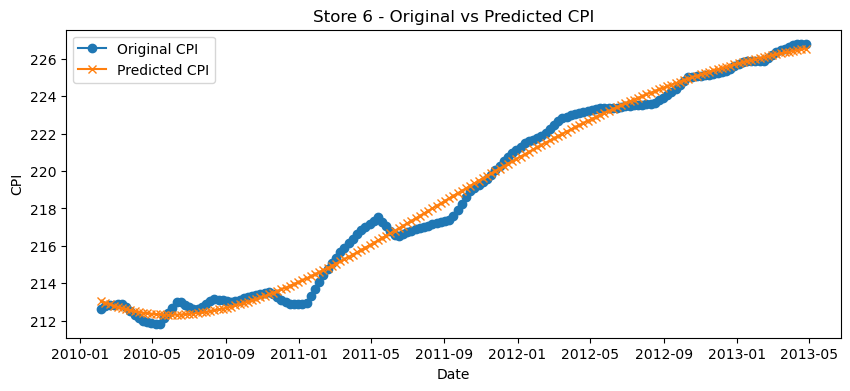

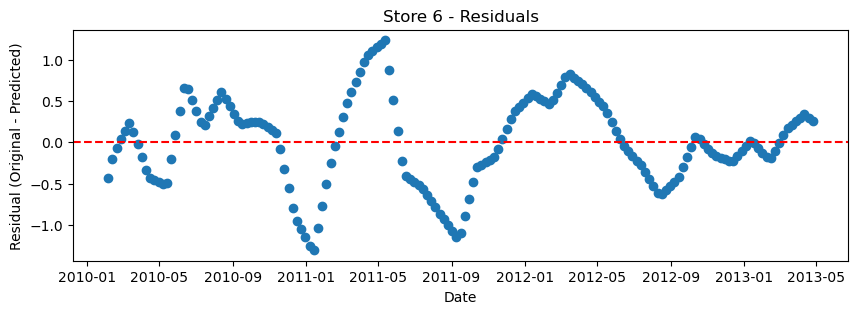

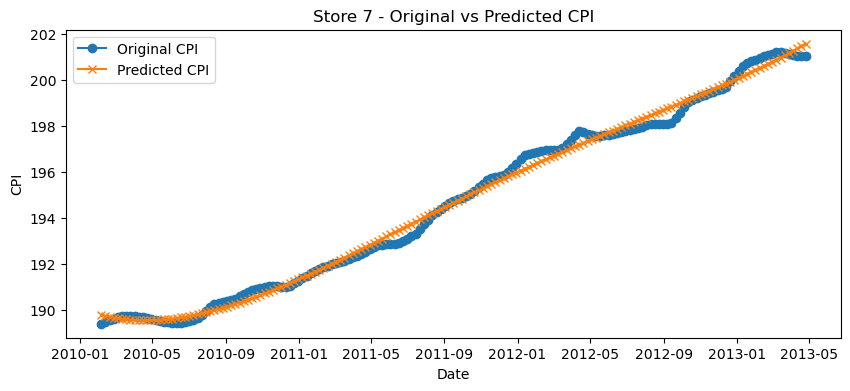

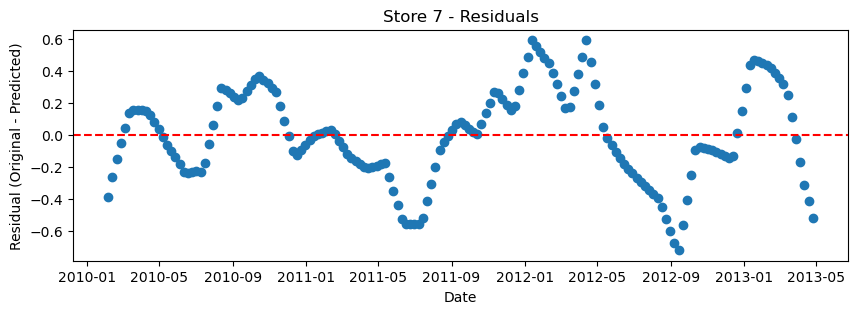

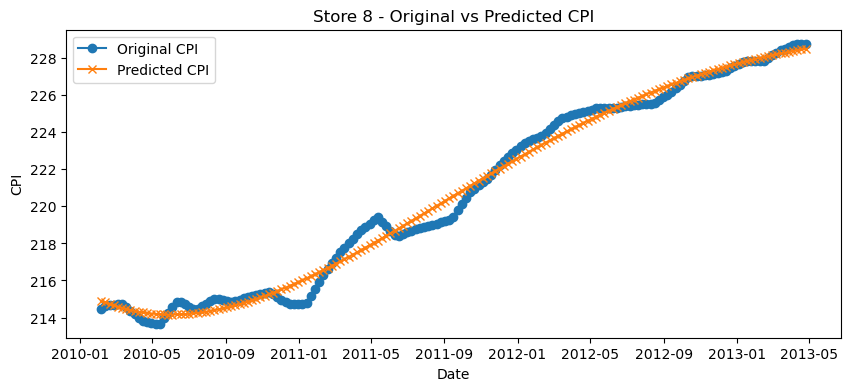

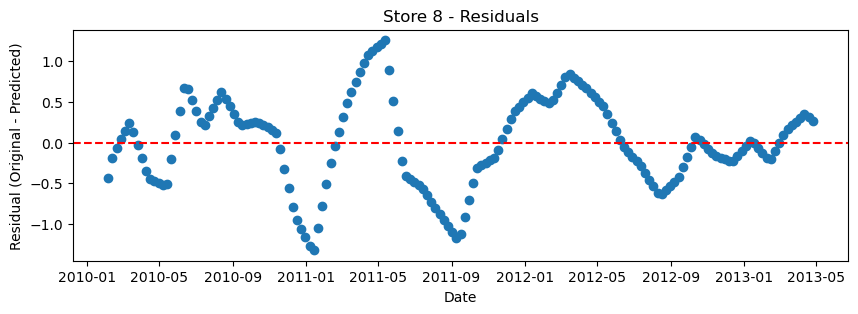

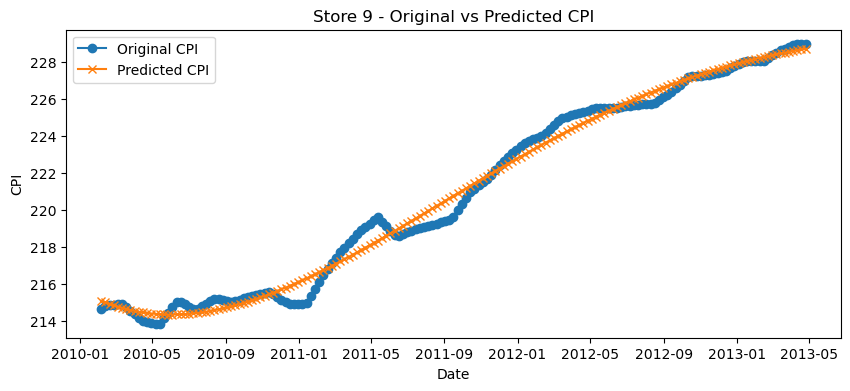

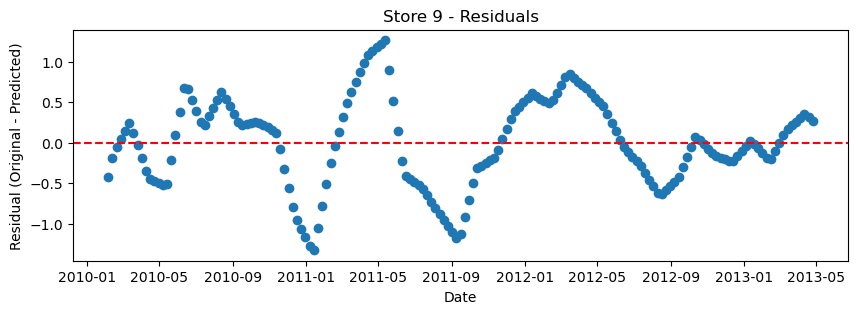

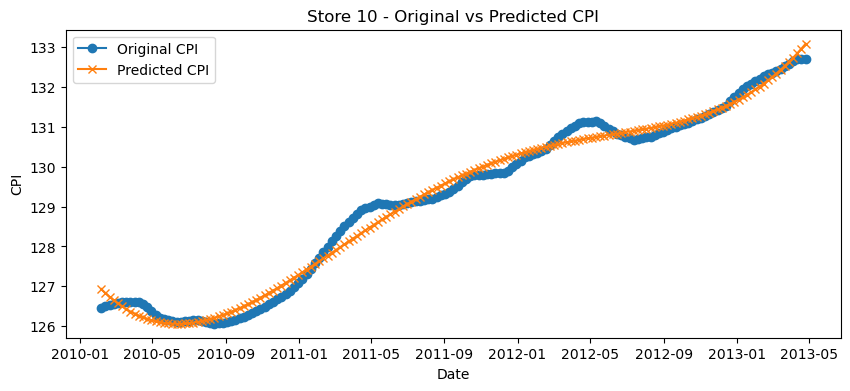

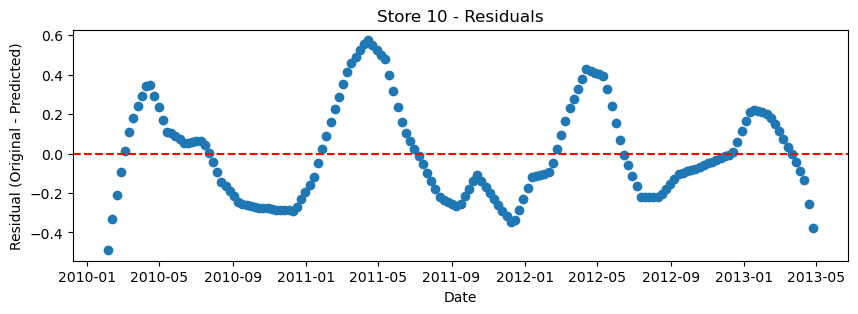

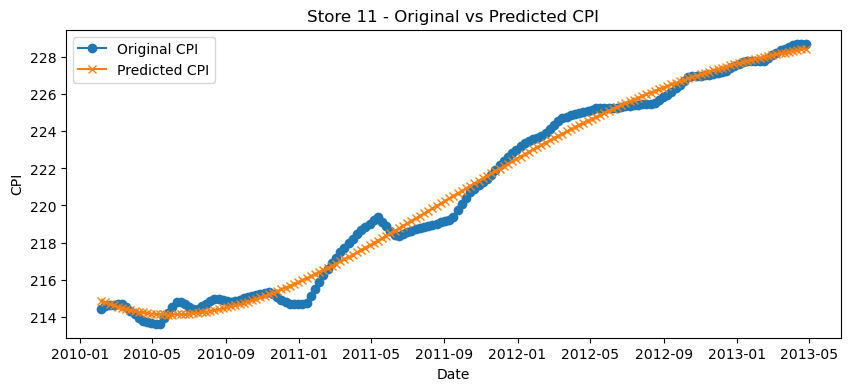

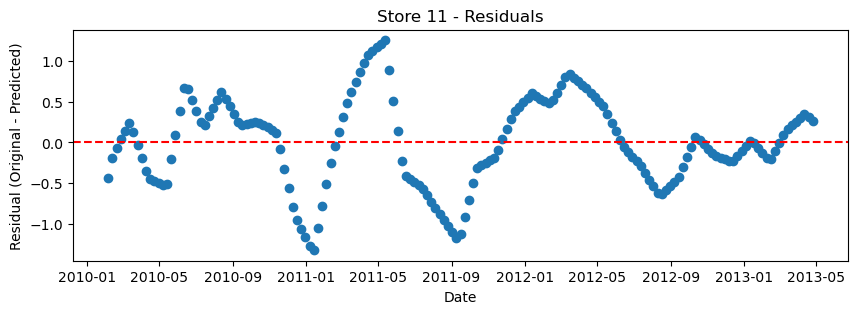

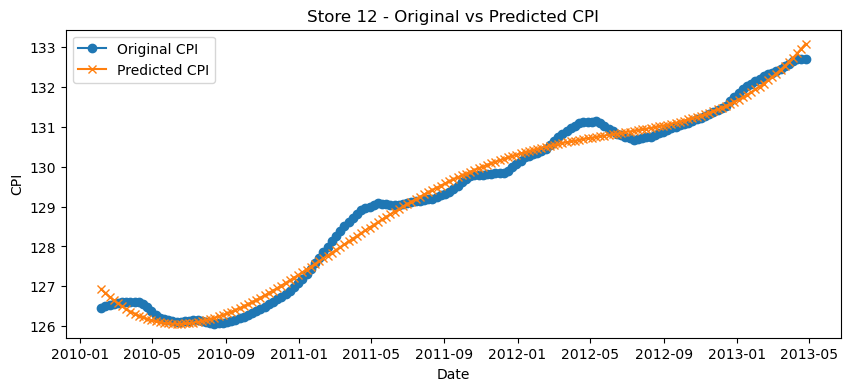

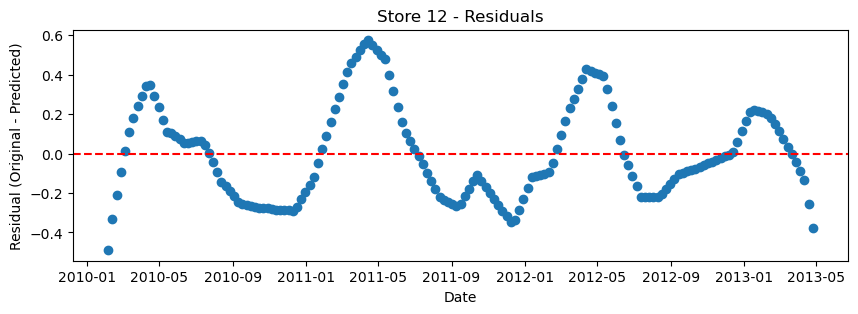

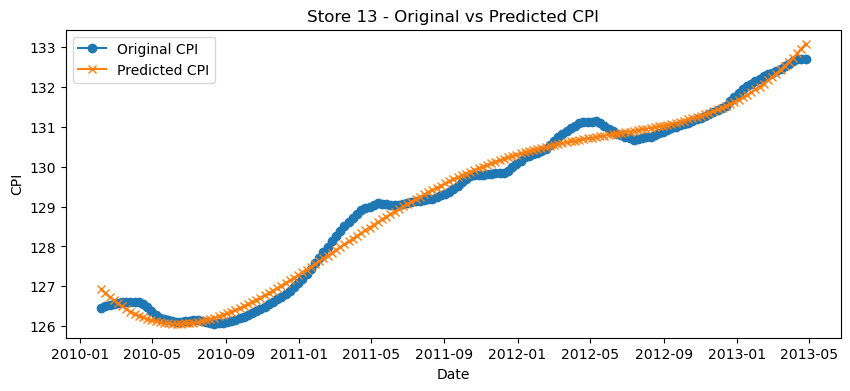

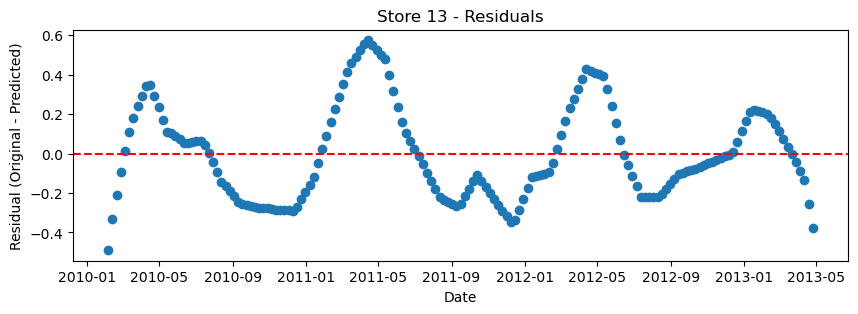

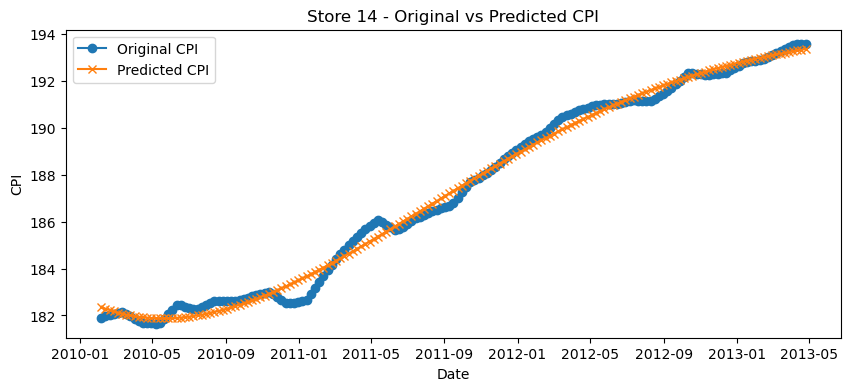

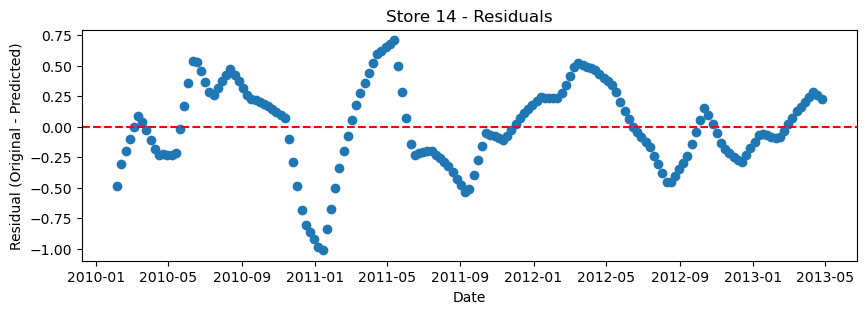

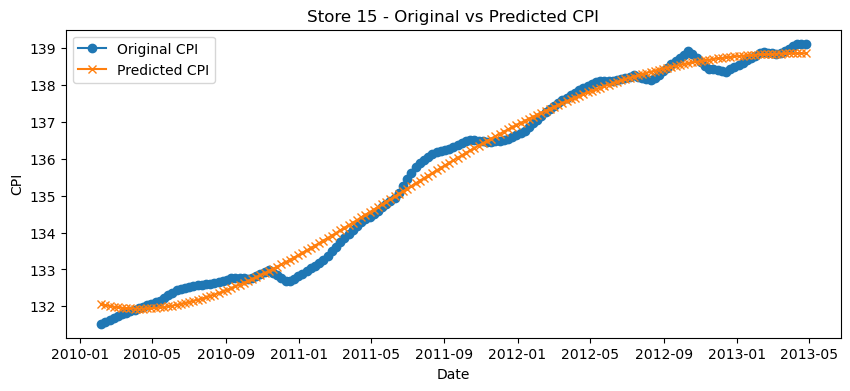

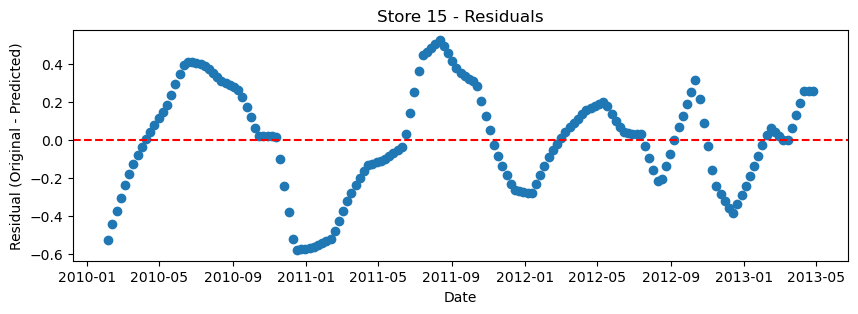

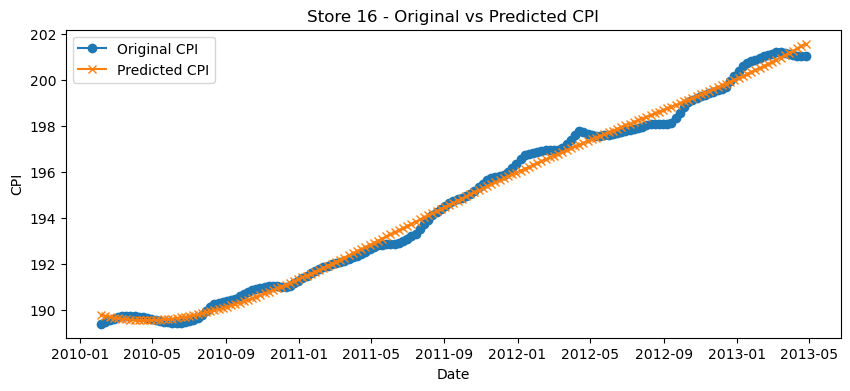

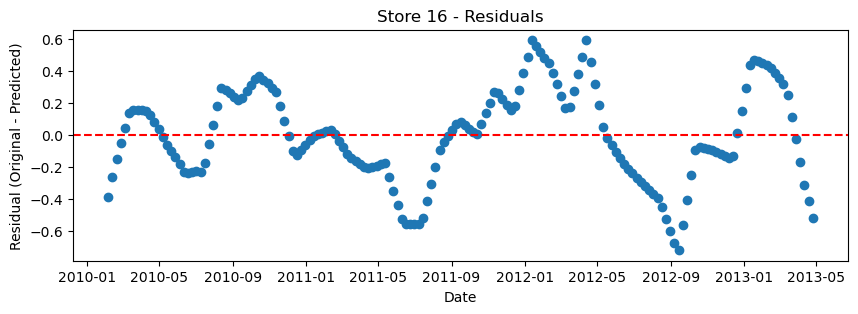

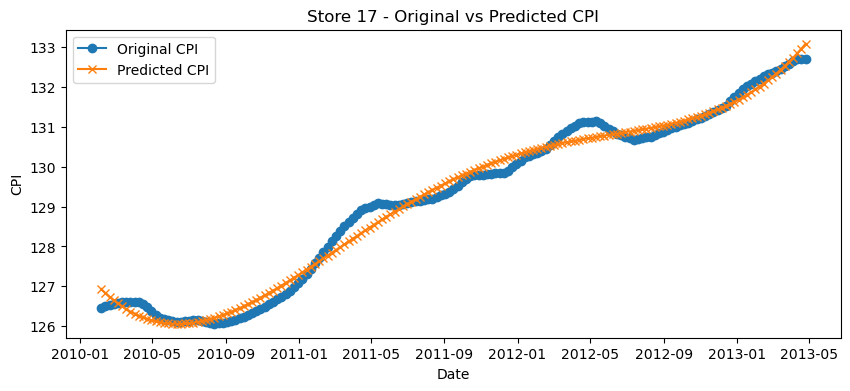

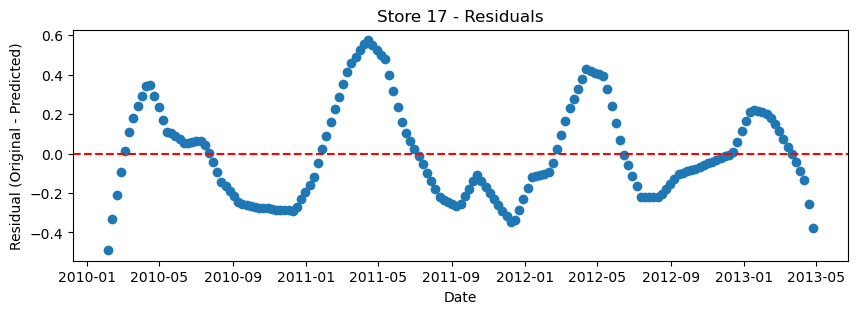

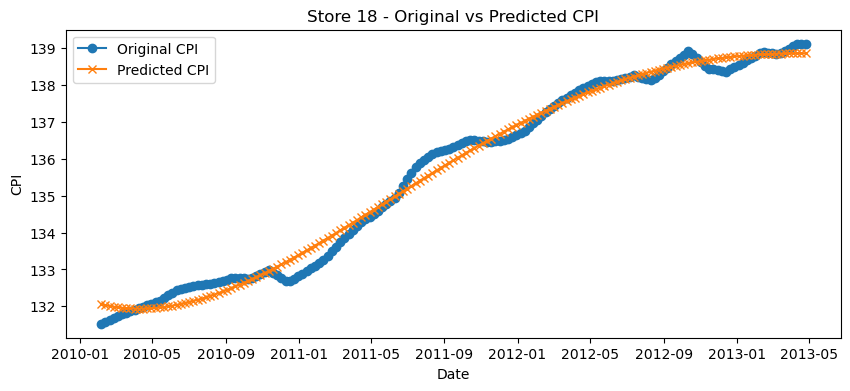

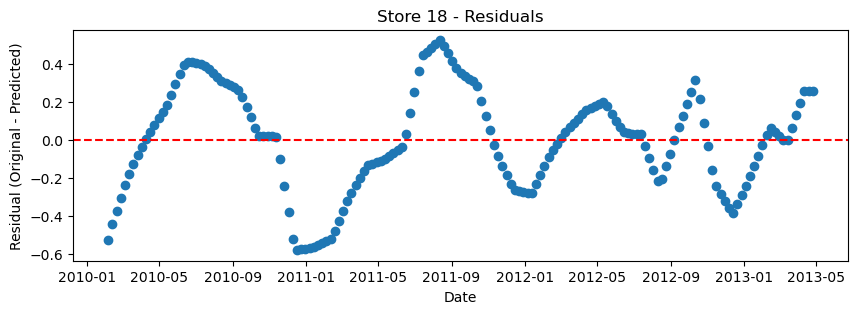

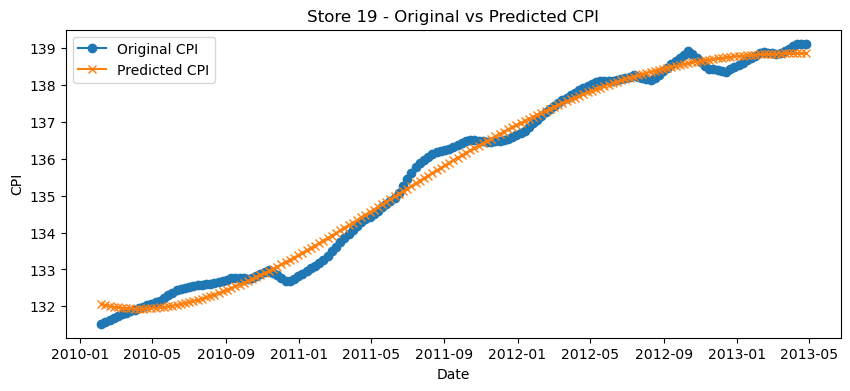

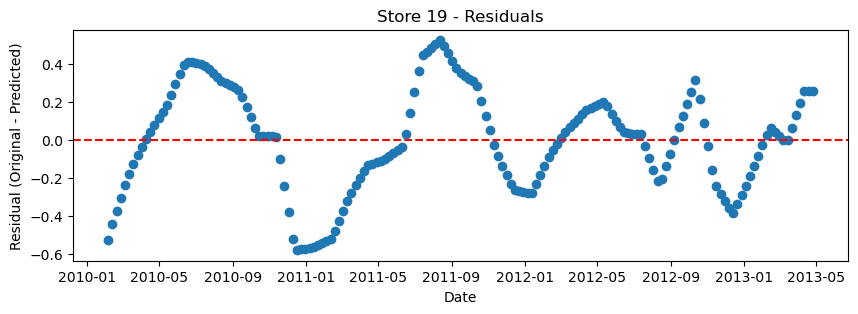

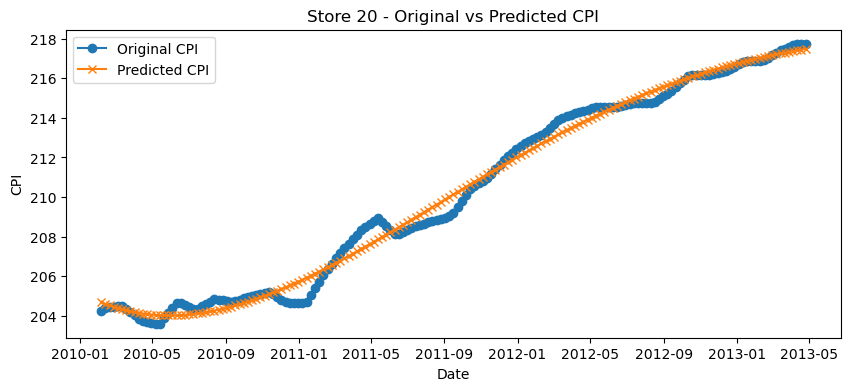

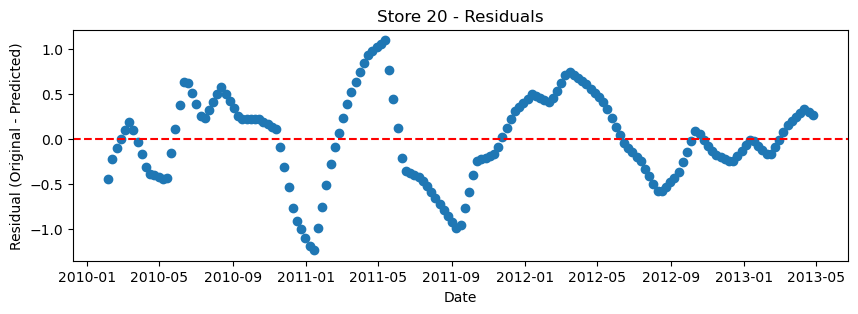

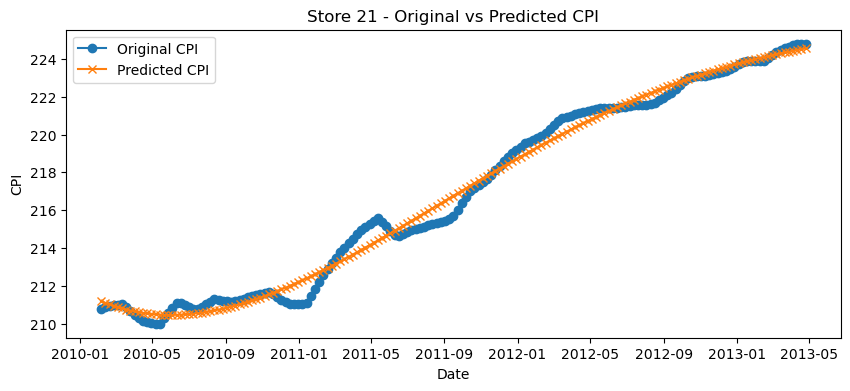

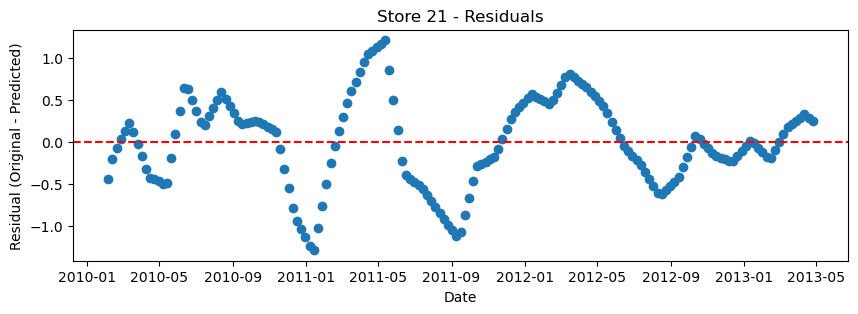

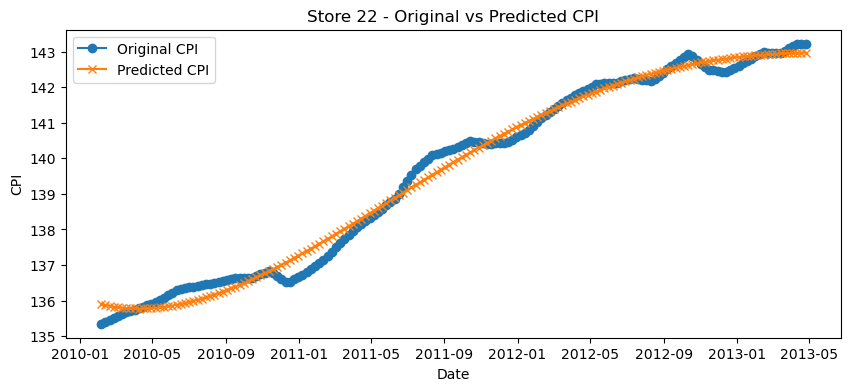

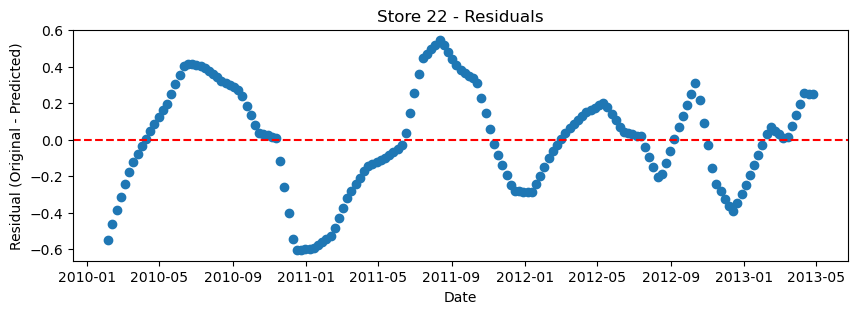

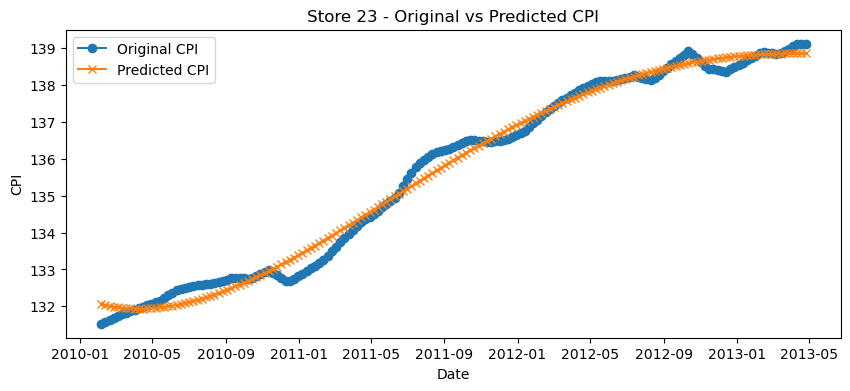

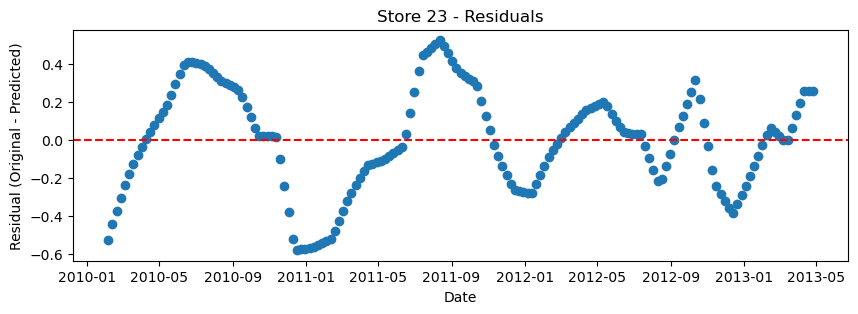

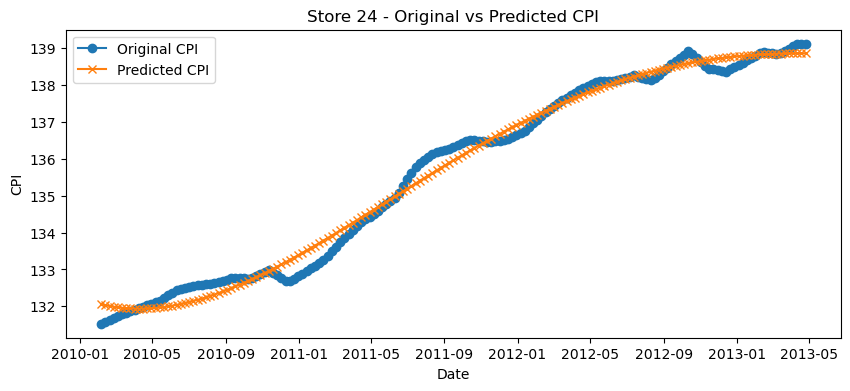

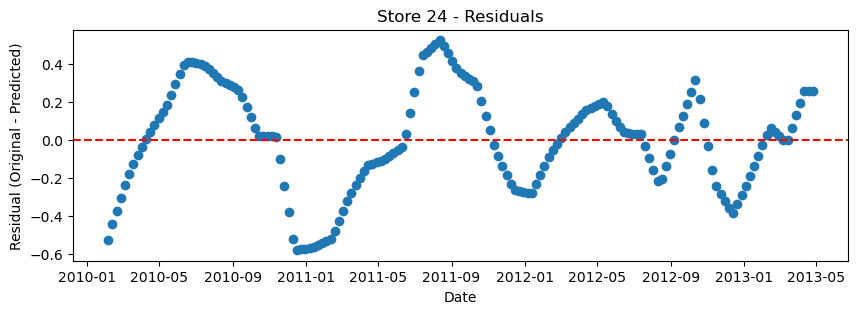

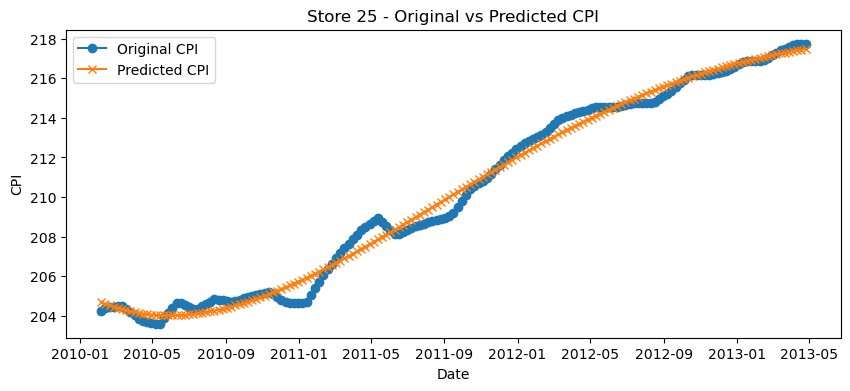

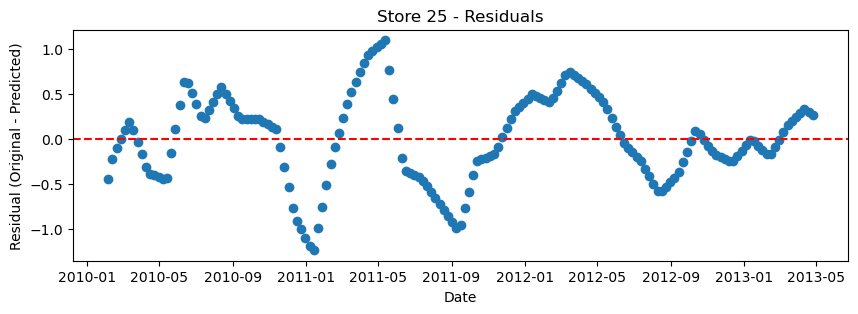

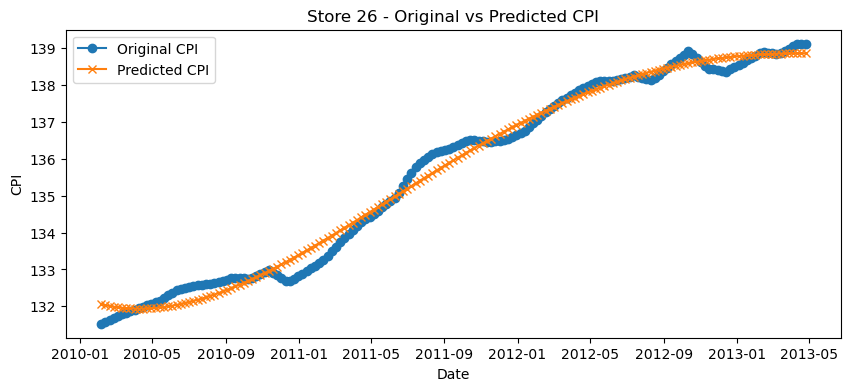

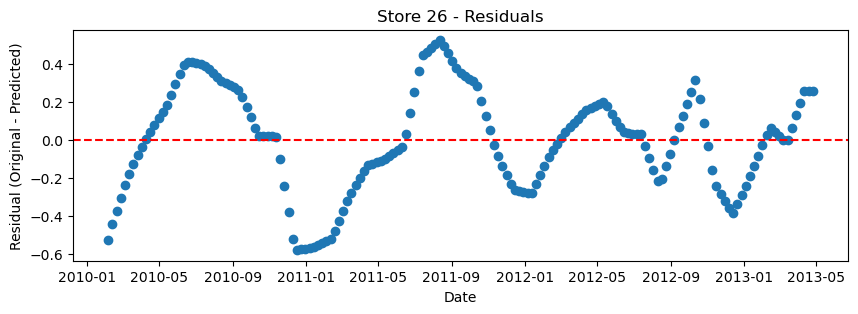

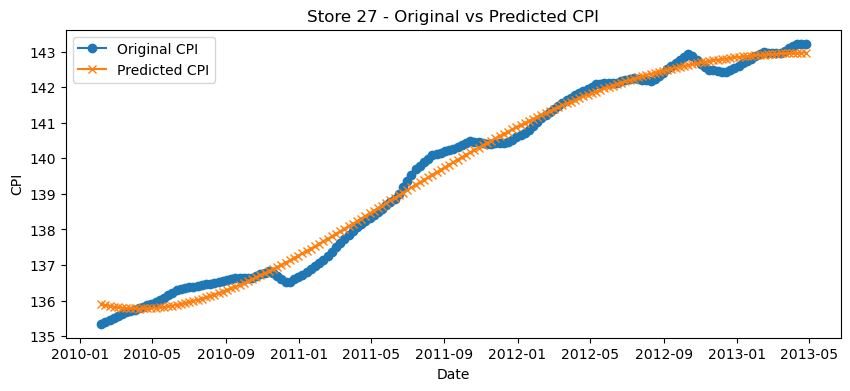

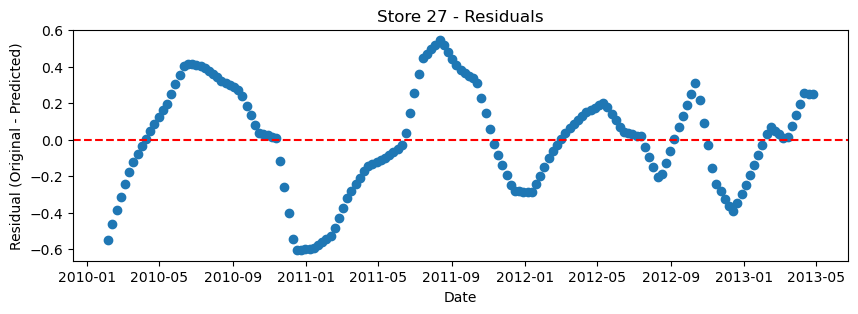

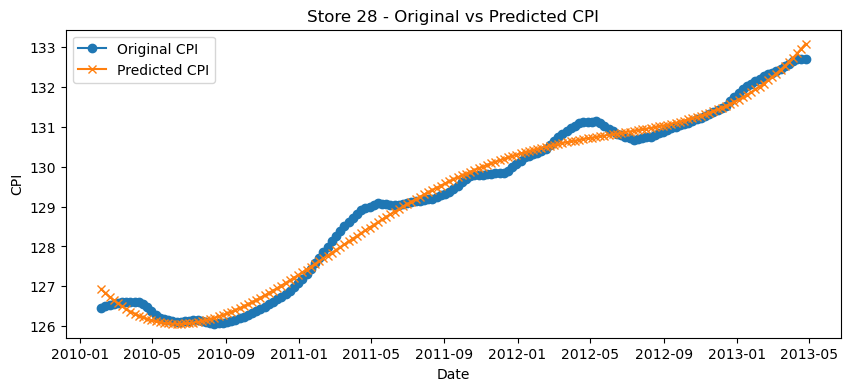

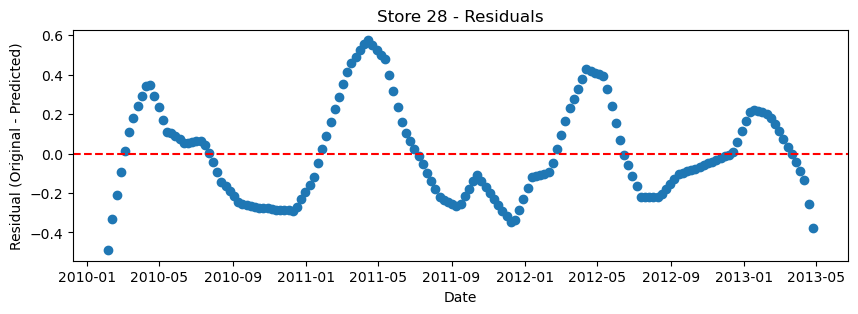

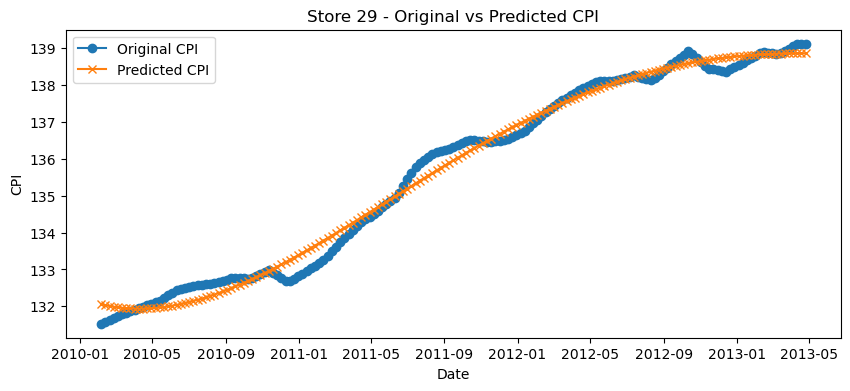

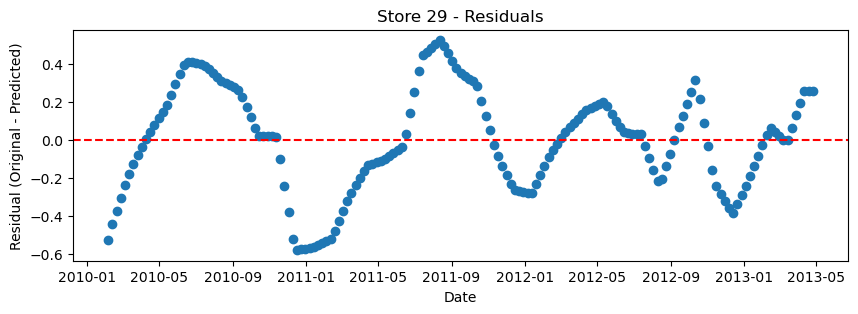

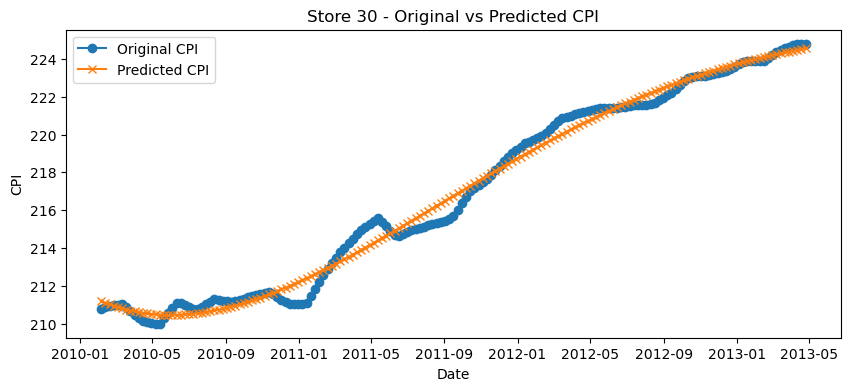

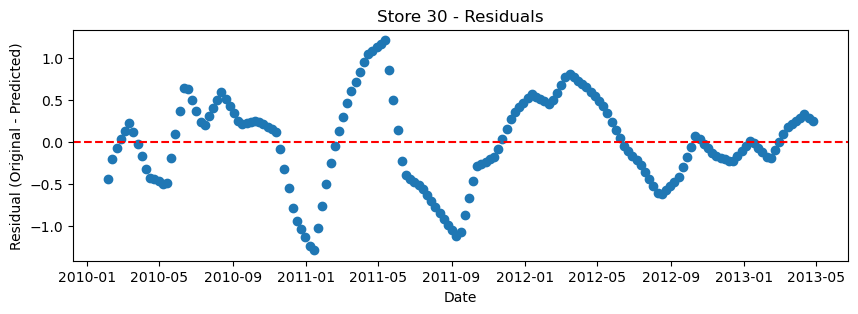

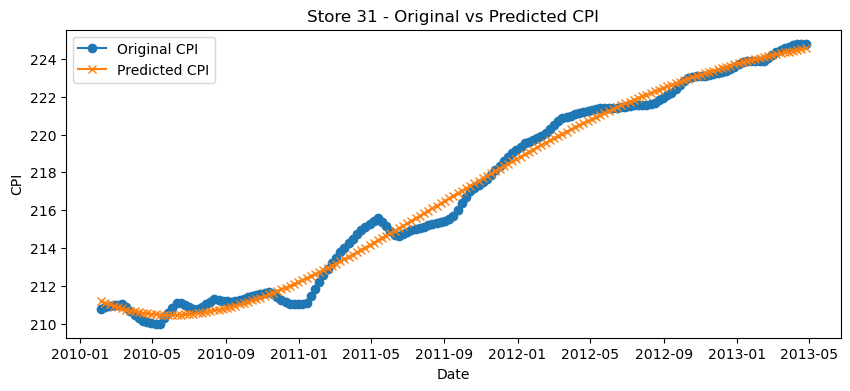

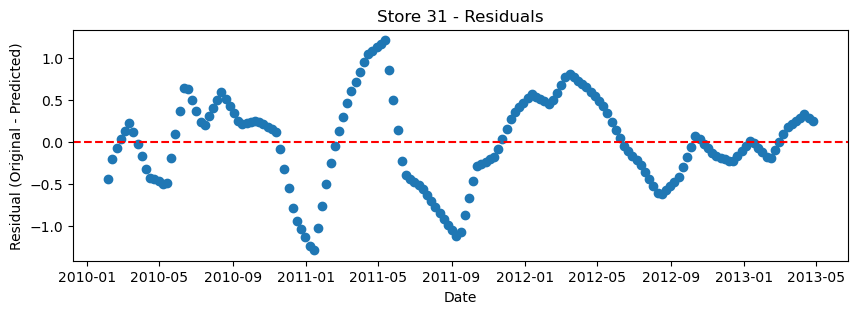

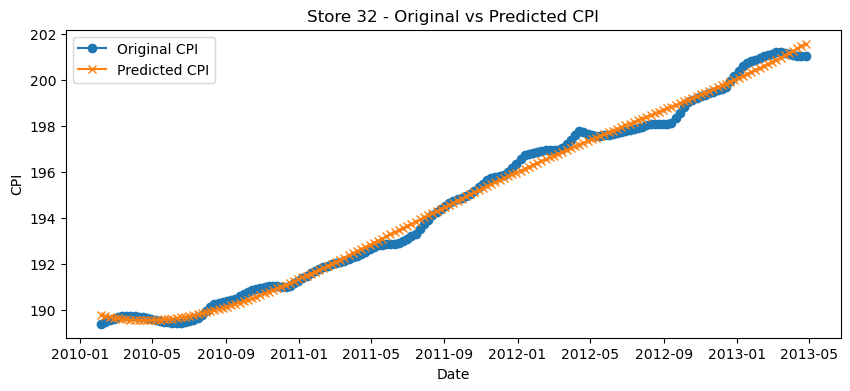

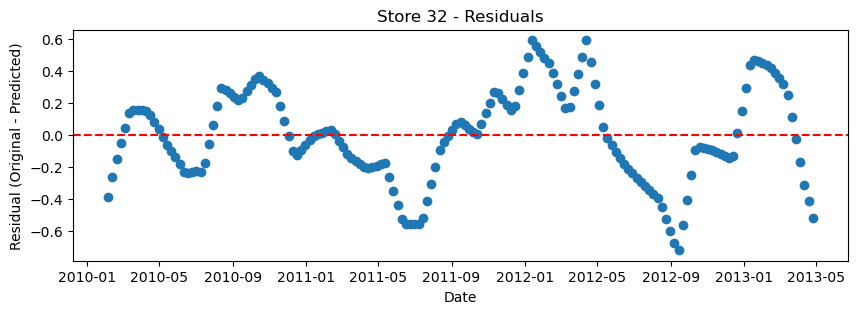

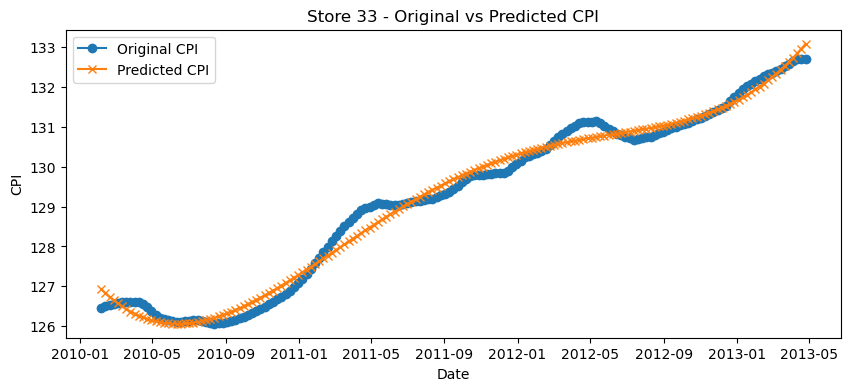

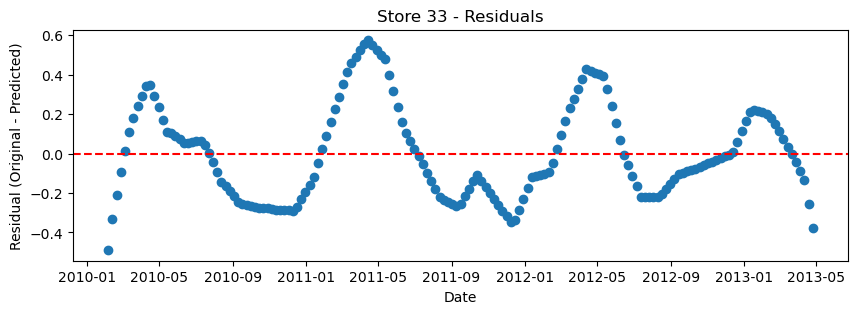

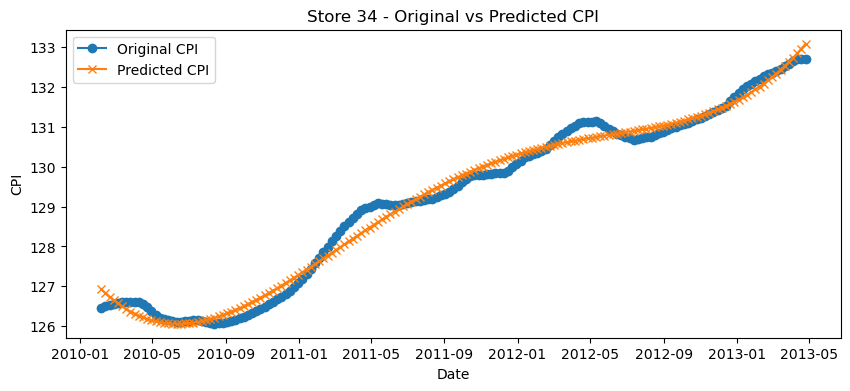

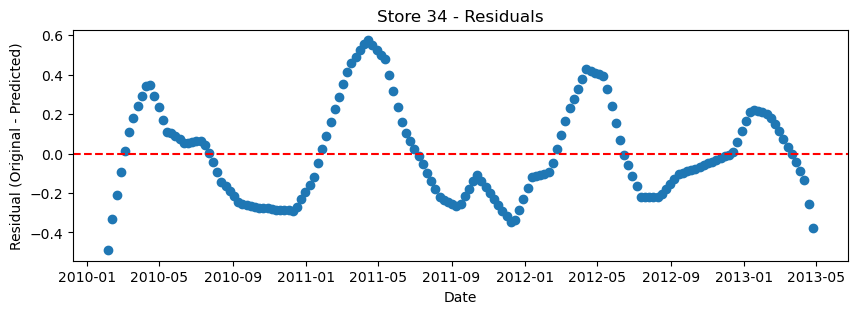

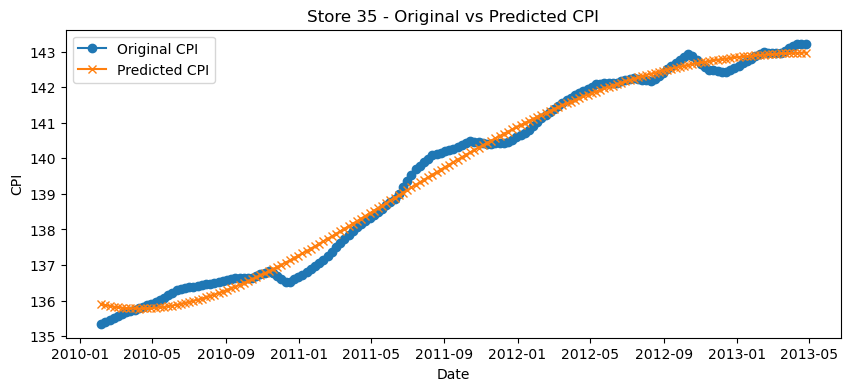

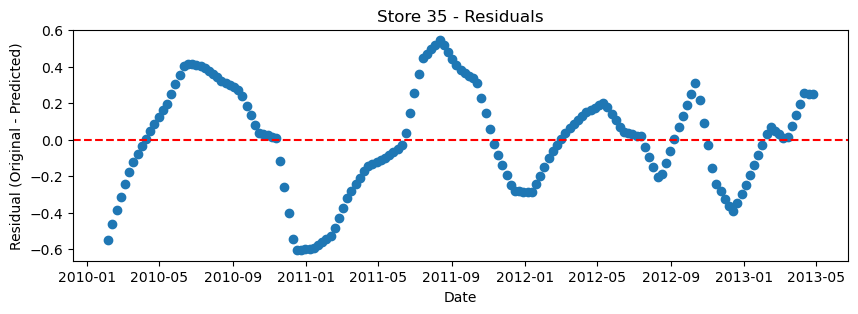

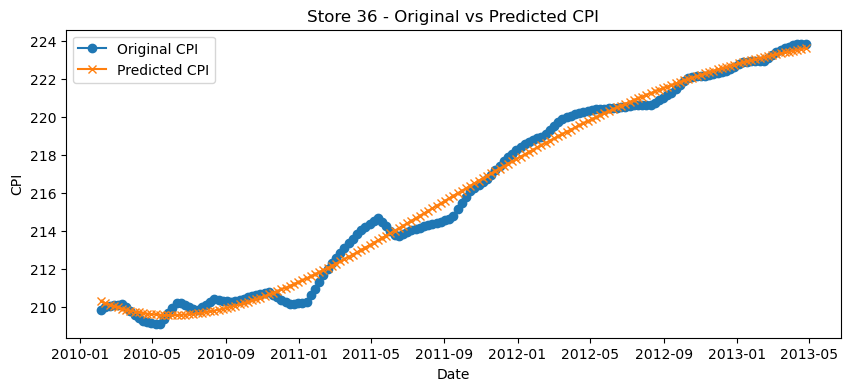

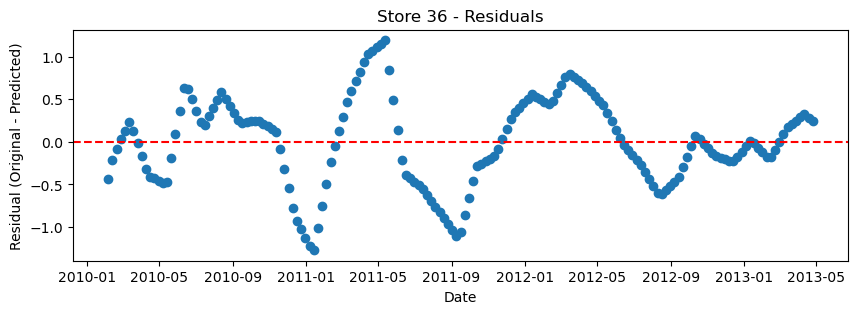

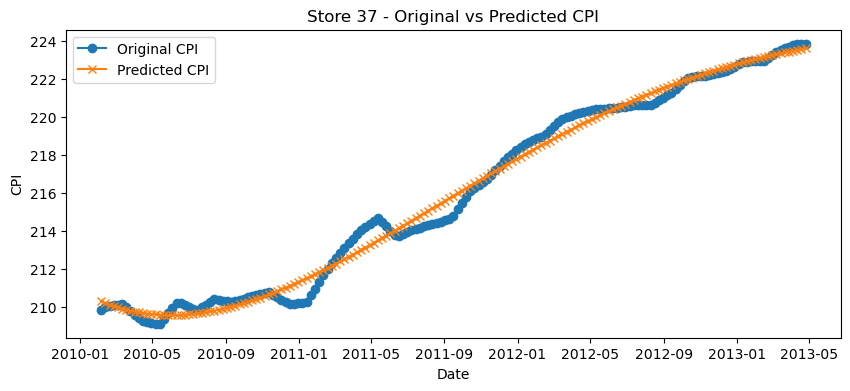

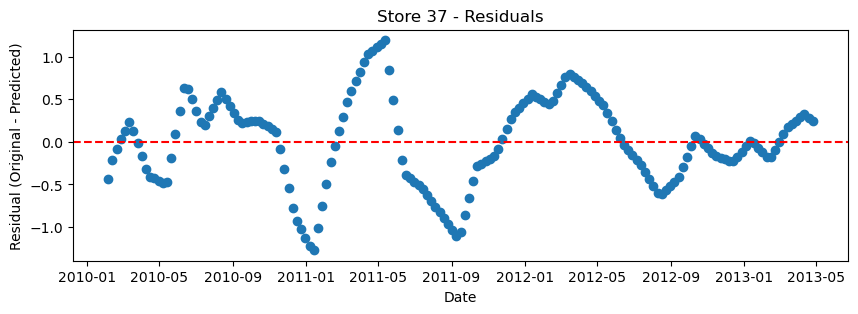

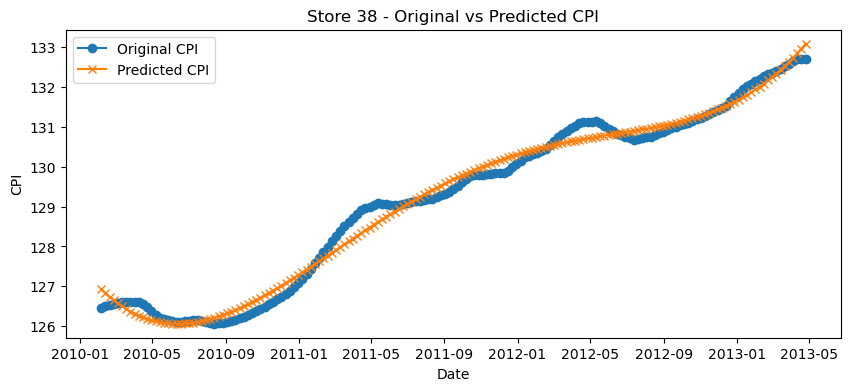

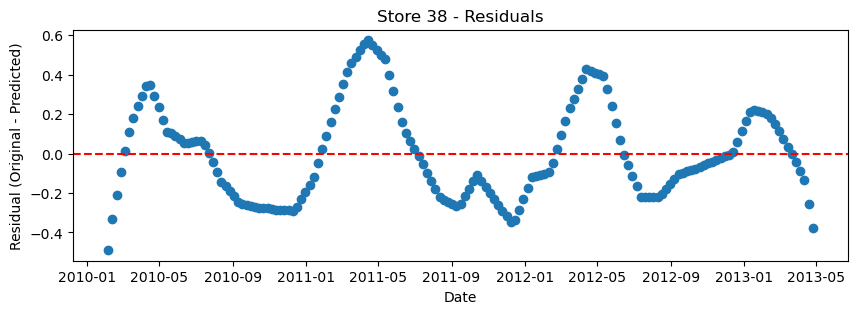

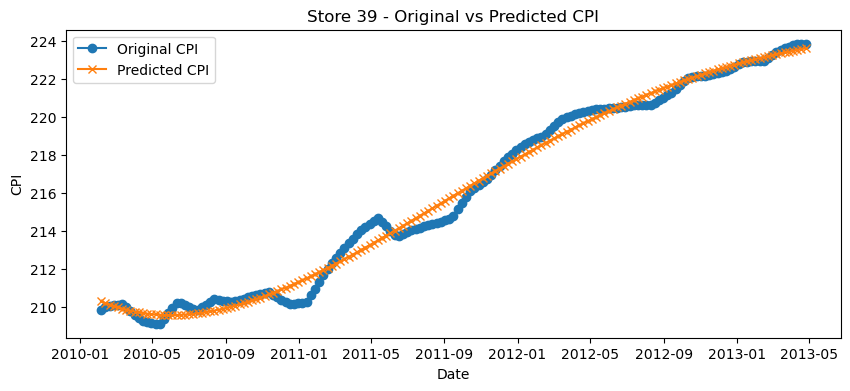

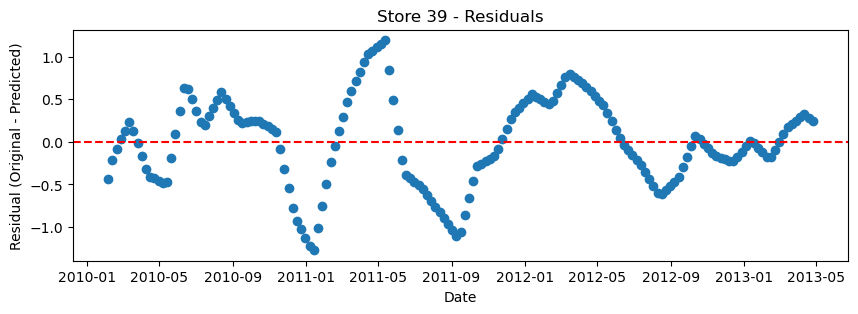

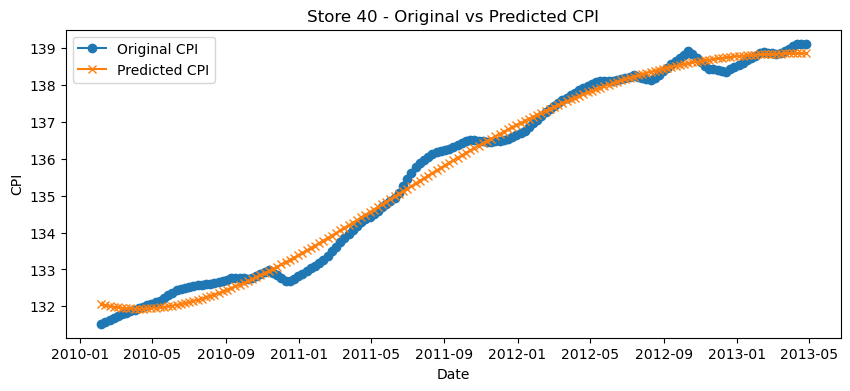

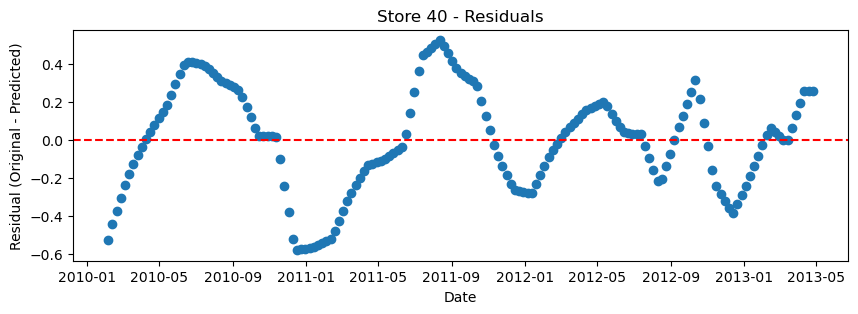

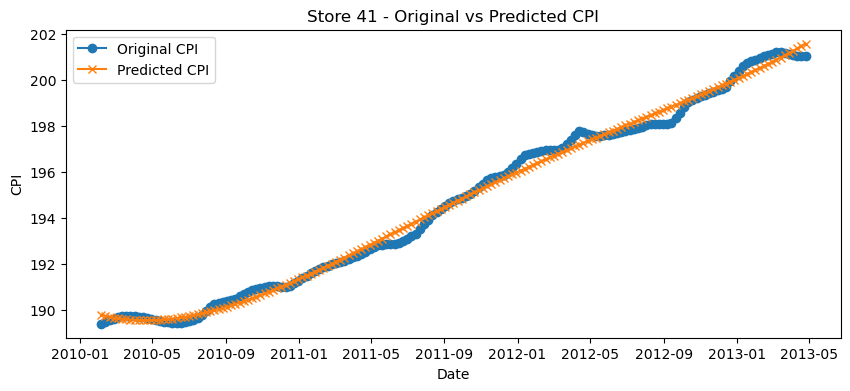

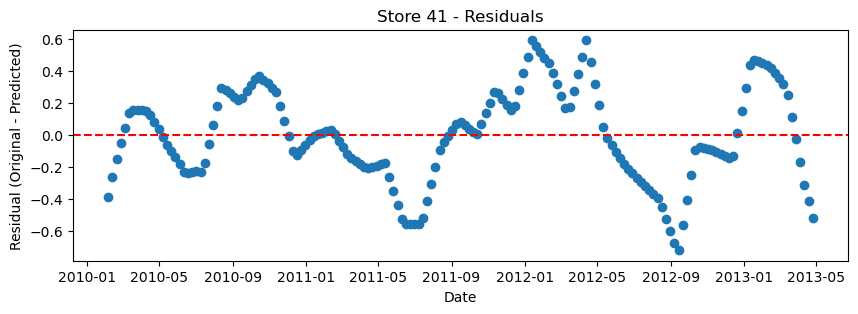

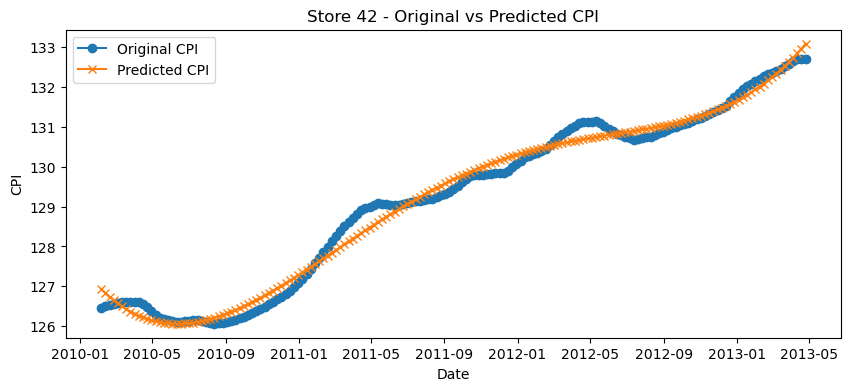

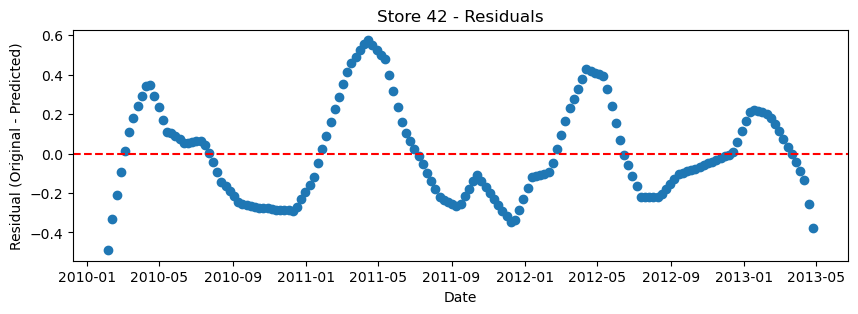

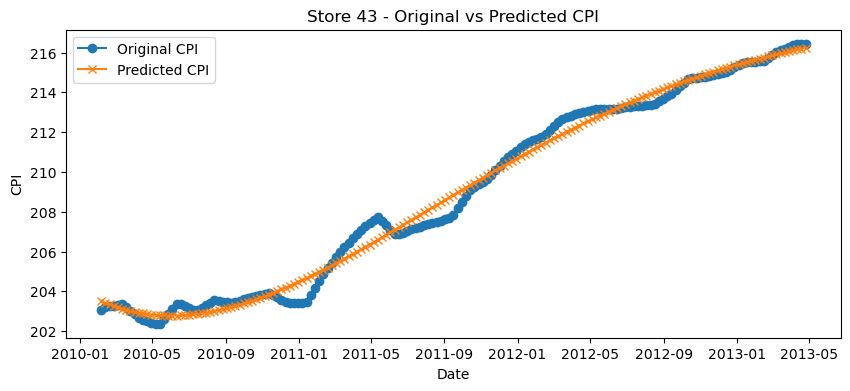

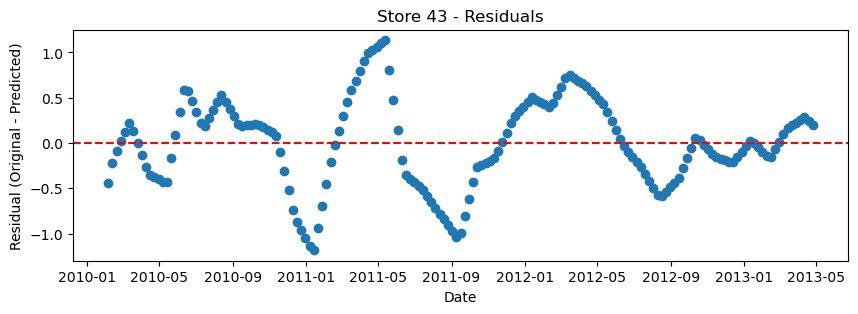

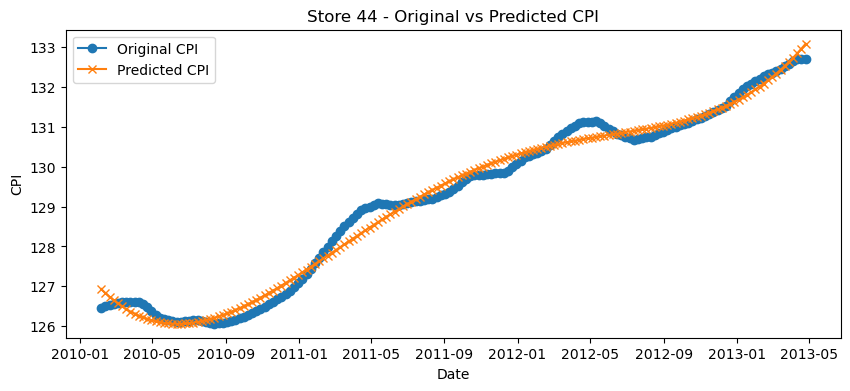

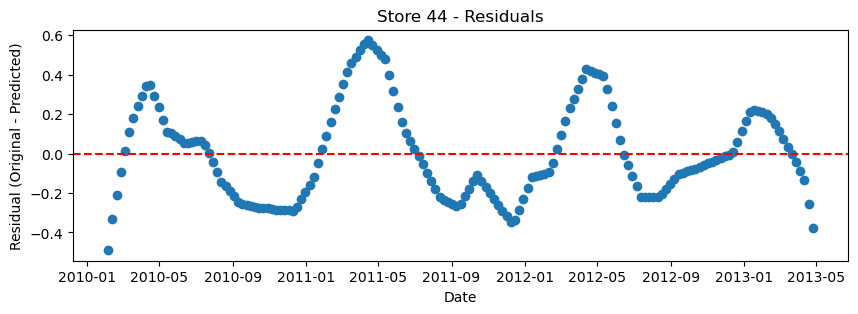

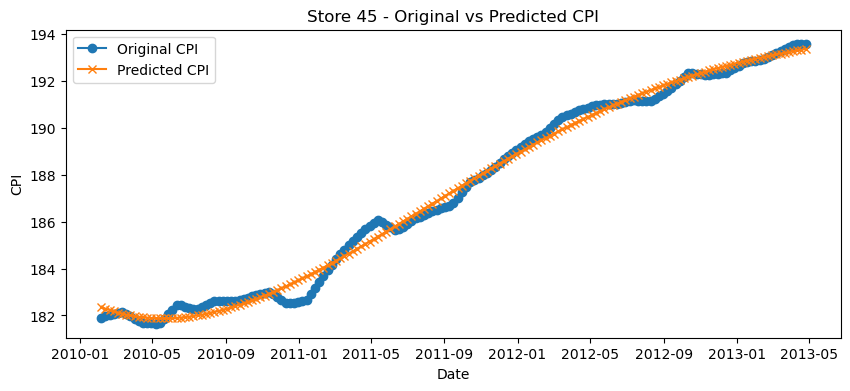

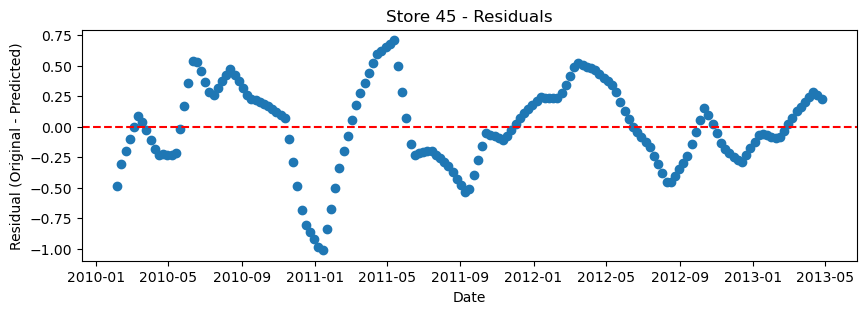

Per-store Polynomial Regression Metrics:
Store 1: RMSE=0.5242, MAE=0.4236, R2=0.9890
Store 2: RMSE=0.5223, MAE=0.4221, R2=0.9890
Store 3: RMSE=0.5427, MAE=0.4387, R2=0.9886
Store 4: RMSE=0.2382, MAE=0.1984, R2=0.9871
Store 5: RMSE=0.5273, MAE=0.4262, R2=0.9889
Store 6: RMSE=0.5326, MAE=0.4305, R2=0.9888
Store 7: RMSE=0.2906, MAE=0.2376, R2=0.9943
Store 8: RMSE=0.5429, MAE=0.4389, R2=0.9886
Store 9: RMSE=0.5439, MAE=0.4397, R2=0.9886
Store 10: RMSE=0.2382, MAE=0.1984, R2=0.9871
Store 11: RMSE=0.5427, MAE=0.4387, R2=0.9886
Store 12: RMSE=0.2382, MAE=0.1984, R2=0.9871
Store 13: RMSE=0.2382, MAE=0.1984, R2=0.9871
Store 14: RMSE=0.3439, MAE=0.2774, R2=0.9928
Store 15: RMSE=0.2714, MAE=0.2205, R2=0.9886
Store 16: RMSE=0.2906, MAE=0.2376, R2=0.9943
Store 17: RMSE=0.2382, MAE=0.1984, R2=0.9871
Store 18: RMSE=0.2714, MAE=0.2205, R2=0.9886
Store 19: RMSE=0.2714, MAE=0.2205, R2=0.9886
Store 20: RMSE=0.4803, MAE=0.3901, R2=0.9899
Store 21: RMSE=0.5223, MAE=0.4221, R2=0.9890
Store 22: RMSE=0.2792, 

In [381]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

store_ids = sorted(cpi_prediction_df['Store'].unique())
store_metrics = {}

for store_id in store_ids:
    subset = cpi_prediction_df[cpi_prediction_df['Store'] == store_id].sort_values('Date')
    
    mask = ~np.isnan(subset['CPI'].values)
    y_true = subset['CPI'].values[mask]
    y_pred = subset['CPI_imputed_poly'].values[mask]
    x_dates = subset['Date'].values[mask]  # Apply same mask to dates
    
    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    store_metrics[store_id] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    
    # Original vs Predicted CPI plot
    plt.figure(figsize=(10,4))
    plt.plot(x_dates, y_true, label='Original CPI', marker='o')
    plt.plot(x_dates, y_pred, label='Predicted CPI', marker='x')
    plt.title(f"Store {store_id} - Original vs Predicted CPI")
    plt.xlabel("Date")
    plt.ylabel("CPI")
    plt.legend()
    plt.show()
    
    # Residual plot
    residuals = y_true - y_pred
    plt.figure(figsize=(10,3))
    plt.scatter(x_dates, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Store {store_id} - Residuals")
    plt.xlabel("Date")
    plt.ylabel("Residual (Original - Predicted)")
    plt.show()

# Print per-store metrics
print("Per-store Polynomial Regression Metrics:")
for store_id, metrics in store_metrics.items():
    print(f"Store {store_id}: RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, R2={metrics['R2']:.4f}")

# Overall metrics
all_rmse = np.mean([m['RMSE'] for m in store_metrics.values()])
all_mae = np.mean([m['MAE'] for m in store_metrics.values()])
all_r2 = np.mean([m['R2'] for m in store_metrics.values()])

print(f"\nOverall Metrics Across Stores: RMSE={all_rmse:.4f}, MAE={all_mae:.4f}, R2={all_r2:.4f}")


#### As it can be seen from the above graphs the Polynomial Regression Model with degree 5 is working really well for the almost all the stores CPI values prediction. Thus we can go ahead with this model being a potential candidate for imputing the values. They definitely not be perfect but it will give a complete dataset with less errors and would not have to deal with null values in case of time series forecasting

In [382]:
cpi_prediction_df.head()

Store       Date Type    Size         CPI  CPI_imputed_linear  \
0      1 2010-02-05    A  151315  211.096358          211.096358   
1      1 2010-02-12    A  151315  211.242170          211.242170   
2      1 2010-02-19    A  151315  211.289143          211.289143   
3      1 2010-02-26    A  151315  211.319643          211.319643   
4      1 2010-03-05    A  151315  211.350143          211.350143   

   CPI_imputed_arima  CPI_imputed_poly Size_bucket  
0                NaN        211.534108      Medium  
1                NaN        211.444796      Medium  
2                NaN        211.361836      Medium  
3                NaN        211.285115      Medium  
4                NaN        211.214524      Medium

In [383]:
features_stores_merged_df['CPI']=features_stores_merged_df['CPI'].fillna(cpi_prediction_df['CPI_imputed_poly'])

In [384]:
print(features_stores_merged_df.isna().sum())
features_stores_merged_df.head()

Store              0
Date               0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment     585
IsHoliday          0
TotalMarkDown      0
Type               0
Size               0
dtype: int64


Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1 2010-02-05        42.31       2.572  211.096358         8.106   
1      1 2010-02-12        38.51       2.548  211.242170         8.106   
2      1 2010-02-19        39.93       2.514  211.289143         8.106   
3      1 2010-02-26        46.63       2.561  211.319643         8.106   
4      1 2010-03-05        46.50       2.625  211.350143         8.106   

   IsHoliday  TotalMarkDown Type    Size  
0      False            0.0    A  151315  
1       True            0.0    A  151315  
2      False            0.0    A  151315  
3      False            0.0    A  151315  
4      False            0.0    A  151315

#### Now lets deal with the case of having null values under the Unemployment feature column. First lets see the number of null values again 

In [385]:
dataset_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
CPI              585
Unemployment     585
IsHoliday          0
TotalMarkDown      0
dtype: int64

#### Same number as that of CPI

In [386]:
dataset_features[(dataset_features['CPI'].isna())&(dataset_features['Unemployment'].isna())].head()
dataset_features[(dataset_features['CPI'].isna())&(dataset_features['Unemployment'].isna())].shape


(585, 8)

#### Wow again just like CPI the Unemployment feature columns is null exactly on those records where CPI happens to be null. Lets check the distribution of the Unemployment feature column

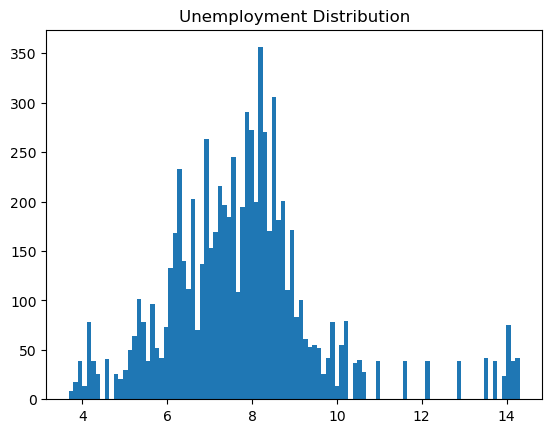

In [387]:
plt.hist(dataset_features['Unemployment'],bins=100)
plt.title("Unemployment Distribution")
plt.show()

#### Also lets check the time series plot of unemployment for all the stores

C:\Windows\Temp\ipykernel_16520\2776730321.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df['Unemployment']=null_df['Unemployment'].fillna(0)


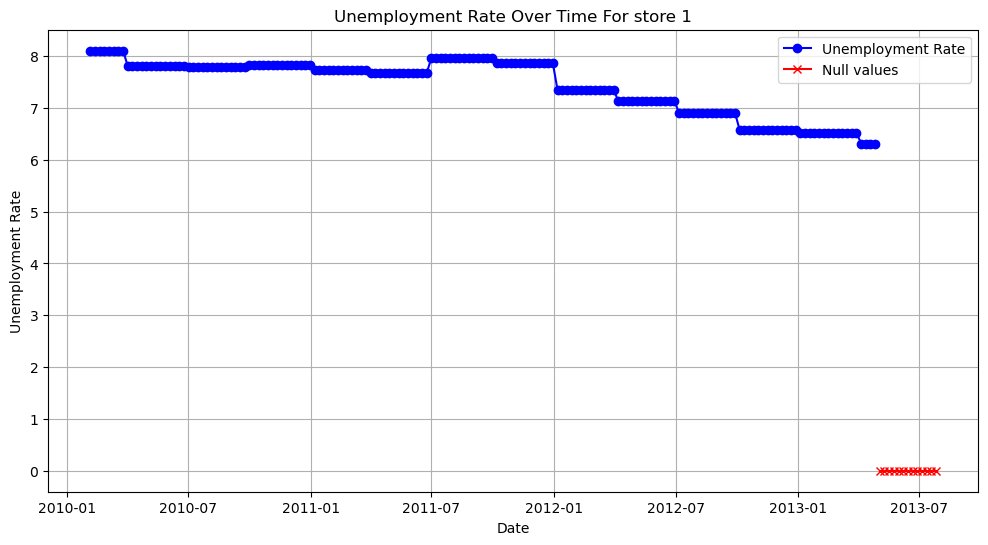

C:\Windows\Temp\ipykernel_16520\2776730321.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df['Unemployment']=null_df['Unemployment'].fillna(0)


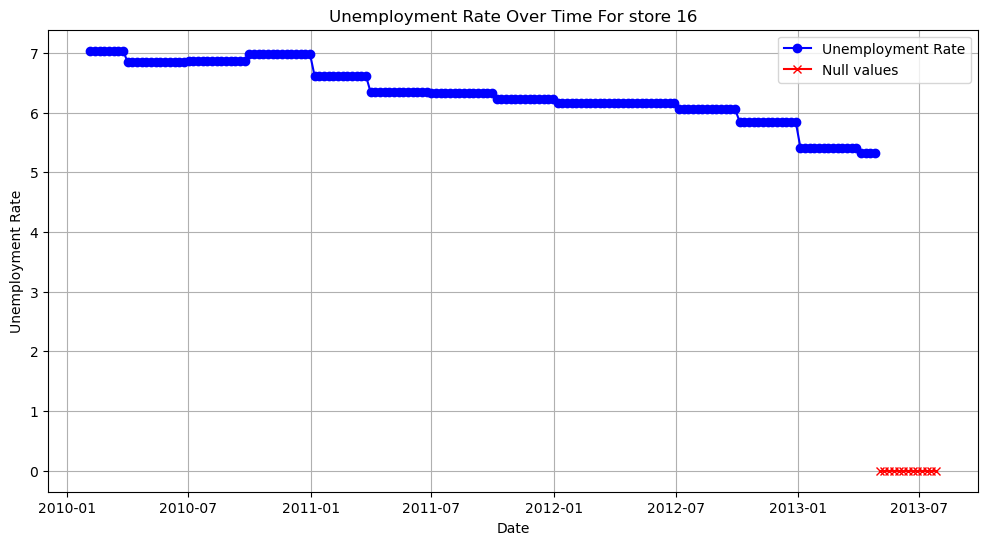

C:\Windows\Temp\ipykernel_16520\2776730321.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df['Unemployment']=null_df['Unemployment'].fillna(0)


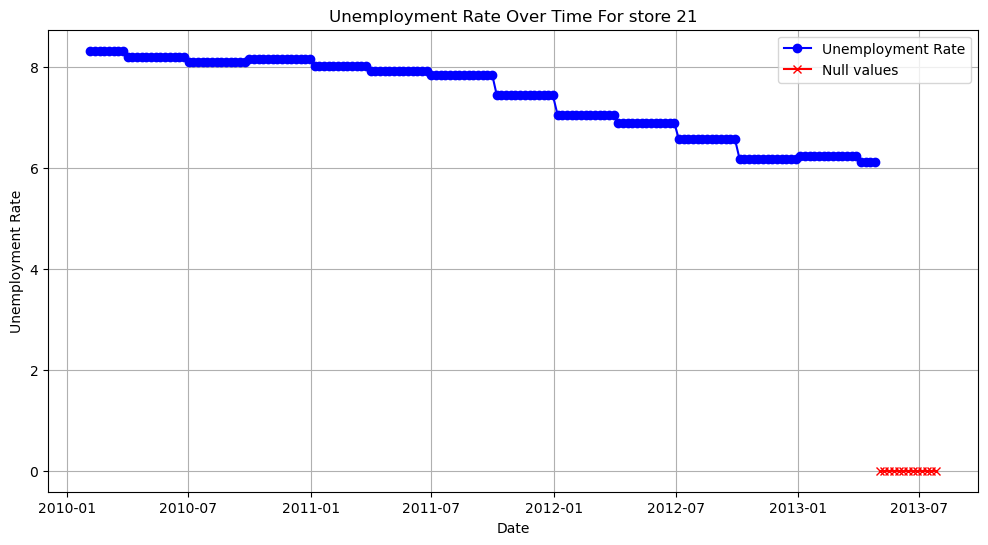

C:\Windows\Temp\ipykernel_16520\2776730321.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df['Unemployment']=null_df['Unemployment'].fillna(0)


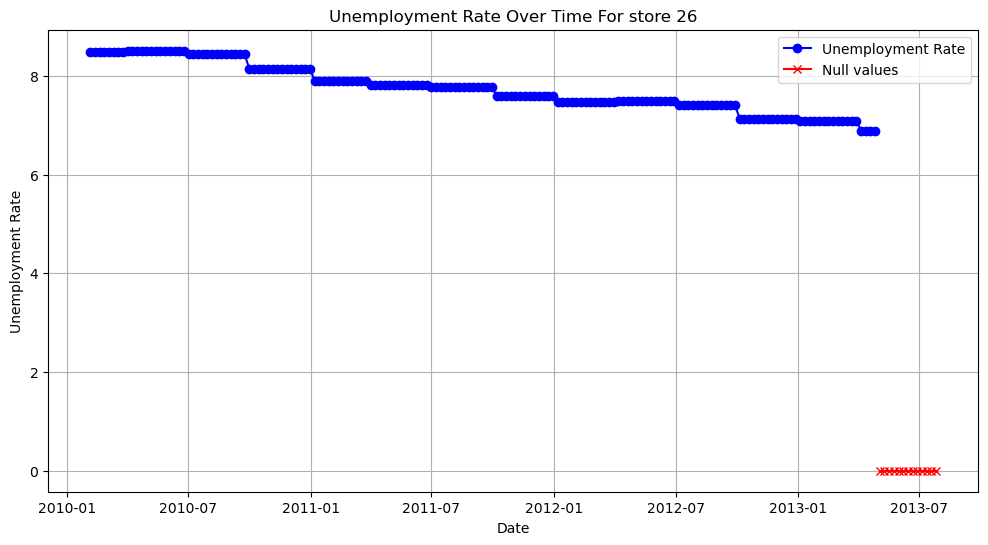

C:\Windows\Temp\ipykernel_16520\2776730321.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df['Unemployment']=null_df['Unemployment'].fillna(0)


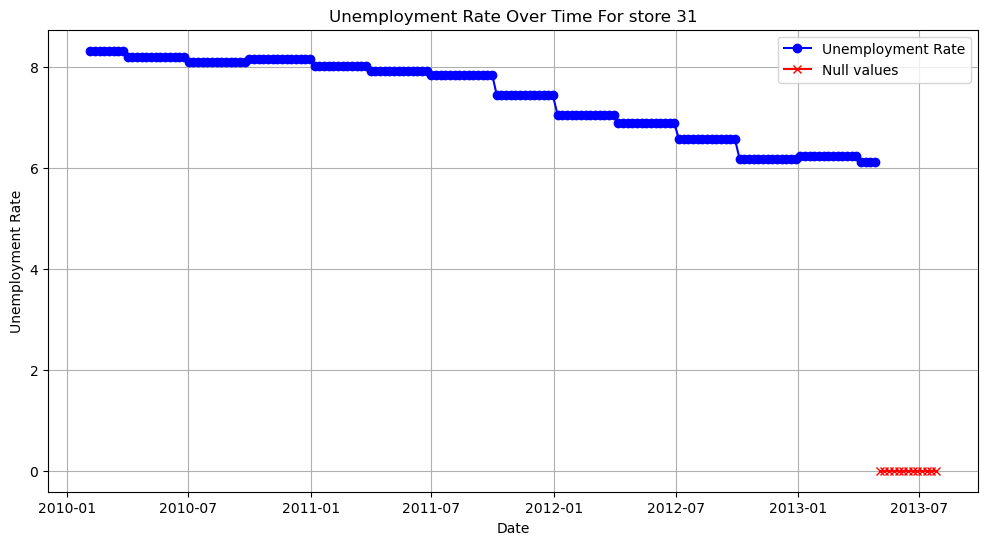

In [388]:
import matplotlib.pyplot as plt
import pandas as pd

store_ids=sorted(dataset_features['Store'].unique()[:5])

for store_id in store_ids:
    unemployment_df_store_1=dataset_features[dataset_features['Store']==store_id].sort_values('Date')[['Date','Unemployment']].reset_index(drop=True)

    temp_df = unemployment_df_store_1.copy()
    temp_df['Date'] = pd.to_datetime(temp_df['Date'])
    temp_df = temp_df.sort_values('Date').reset_index(drop=True)

    non_null_df = temp_df[temp_df['Unemployment'].notna()]
    null_df=temp_df[temp_df['Unemployment'].isna()]
    null_df['Unemployment']=null_df['Unemployment'].fillna(0)

    plt.figure(figsize=(12,6))
    plt.plot(
        non_null_df['Date'],
        non_null_df['Unemployment'],
        marker='o',
        linestyle='-',
        color='blue',
        label='Unemployment Rate'
    )
    plt.plot(
        null_df['Date'],
        null_df['Unemployment'],
        marker='x',
        linestyle='-',
        color='red',
        label='Null values'
    )

    plt.title(f'Unemployment Rate Over Time For store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate')
    plt.grid(True,which='major')
    plt.legend()
    plt.show()


#### Looks like all the null values are ahead of all the data points

#### The unemployment feature columns values work in form of a step function going over a certain period so clearly we impute same values to all the null values provided that they are associated in a certain time frame but we will have to figure that out. In case that there are null values present in a different time frame we will have to figure out where all the null values lie and proceed accordingly

#### Lets try forward fill

In [389]:
import pandas as pd

unemployment_df = dataset_features.copy()

unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])
unemployment_df = unemployment_df.sort_values(['Store', 'Date']).reset_index(drop=True)

unemployment_df['Unemployment_FF'] = unemployment_df.groupby('Store')['Unemployment'].fillna(method='ffill')

unemployment_df['Unemployment_FF'] = unemployment_df.groupby('Store')['Unemployment_FF'].fillna(method='bfill')


C:\Windows\Temp\ipykernel_16520\543748408.py:8: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  unemployment_df['Unemployment_FF'] = unemployment_df.groupby('Store')['Unemployment'].fillna(method='ffill')
C:\Windows\Temp\ipykernel_16520\543748408.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  unemployment_df['Unemployment_FF'] = unemployment_df.groupby('Store')['Unemployment'].fillna(method='ffill')
C:\Windows\Temp\ipykernel_16520\543748408.py:10: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  unemployment_df['Unemployment_FF'] = u

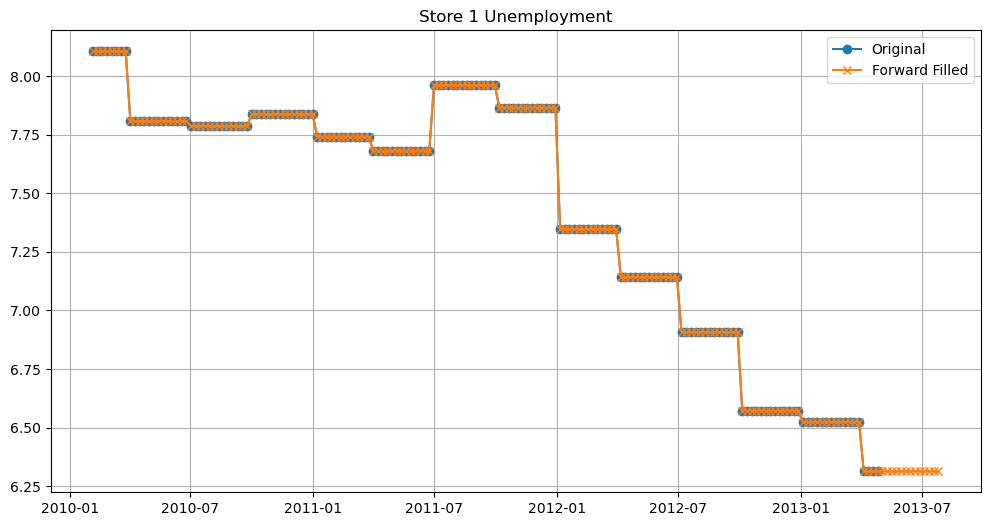

In [390]:
import matplotlib.pyplot as plt

# Plot example store
store = unemployment_df['Store'].unique()[0]
temp = unemployment_df[unemployment_df['Store'] == store]

plt.figure(figsize=(12,6))
plt.plot(temp['Date'], temp['Unemployment'], marker='o', label='Original')
plt.plot(temp['Date'], temp['Unemployment_FF'], marker='x', label='Forward Filled')
plt.title(f'Store {store} Unemployment')
plt.grid(True)
plt.legend()
plt.show()


In [391]:
unemployment_df.head()

Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1 2010-02-05        42.31       2.572  211.096358         8.106   
1      1 2010-02-12        38.51       2.548  211.242170         8.106   
2      1 2010-02-19        39.93       2.514  211.289143         8.106   
3      1 2010-02-26        46.63       2.561  211.319643         8.106   
4      1 2010-03-05        46.50       2.625  211.350143         8.106   

   IsHoliday  TotalMarkDown  Unemployment_FF  
0      False            0.0            8.106  
1       True            0.0            8.106  
2      False            0.0            8.106  
3      False            0.0            8.106  
4      False            0.0            8.106

In [392]:
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd

store_id = 1

unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])
store_df = unemployment_df[unemployment_df['Store'] == store_id].sort_values('Date')
store_df = store_df.set_index('Date')

quarterly_unemp = store_df['Unemployment'].resample('QE').mean()
model = AutoReg(quarterly_unemp, lags=1).fit()

forecast = model.predict(start=len(quarterly_unemp), end=len(quarterly_unemp))
print(f"Forecasted unemployment for next quarter (Store {store_id}): {forecast.iloc[0]}")

Forecasted unemployment for next quarter (Store 1): nan


In [393]:
print(quarterly_unemp)
print(quarterly_unemp.isnull().sum())

Date
2010-03-31    8.106
2010-06-30    7.808
2010-09-30    7.787
2010-12-31    7.838
2011-03-31    7.742
2011-06-30    7.682
2011-09-30    7.962
2011-12-31    7.866
2012-03-31    7.348
2012-06-30    7.143
2012-09-30    6.908
2012-12-31    6.573
2013-03-31    6.525
2013-06-30    6.314
2013-09-30      NaN
Freq: QE-DEC, Name: Unemployment, dtype: float64
1


In [394]:
unemployment_df[(unemployment_df['Unemployment'].isna())&(unemployment_df['Store']==1)].shape

(13, 9)

In [395]:
filter_df=unemployment_df[((unemployment_df['Store']==1) & (unemployment_df['Date']<='2013-07-01')) & ((unemployment_df['Unemployment']<6.5) | (unemployment_df['Unemployment'].isna()))]
print(filter_df)
print(filter_df.shape)

     Store       Date  Temperature  Fuel_Price        CPI  Unemployment  \
165      1 2013-04-05        58.59       3.583  225.08654         6.314   
166      1 2013-04-12        62.72       3.529  225.17016         6.314   
167      1 2013-04-19        67.10       3.451  225.17016         6.314   
168      1 2013-04-26        59.23       3.417  225.17016         6.314   
169      1 2013-05-03        66.66       3.386        NaN           NaN   
170      1 2013-05-10        63.90       3.392        NaN           NaN   
171      1 2013-05-17        69.53       3.454        NaN           NaN   
172      1 2013-05-24        77.19       3.494        NaN           NaN   
173      1 2013-05-31        78.02       3.466        NaN           NaN   
174      1 2013-06-07        76.44       3.439        NaN           NaN   
175      1 2013-06-14        79.86       3.431        NaN           NaN   
176      1 2013-06-21        81.35       3.479        NaN           NaN   
177      1 2013-06-28    

In [396]:
import pandas as pd

unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])
unemployment_df=unemployment_df.sort_values(by=['Store','Date']).reset_index(drop=True)

cutoff_date = pd.to_datetime('2013-07-01')

mask = unemployment_df['Date'] <= cutoff_date

unemployment_df.loc[mask, 'Unemployment'] = unemployment_df.loc[mask, 'Unemployment'].ffill()

In [397]:
unemployment_df.isna().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
CPI                585
Unemployment       180
IsHoliday            0
TotalMarkDown        0
Unemployment_FF      0
dtype: int64

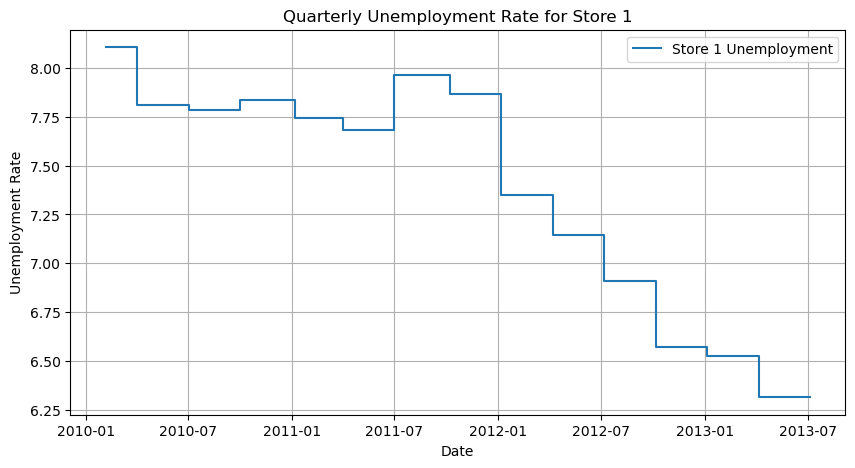

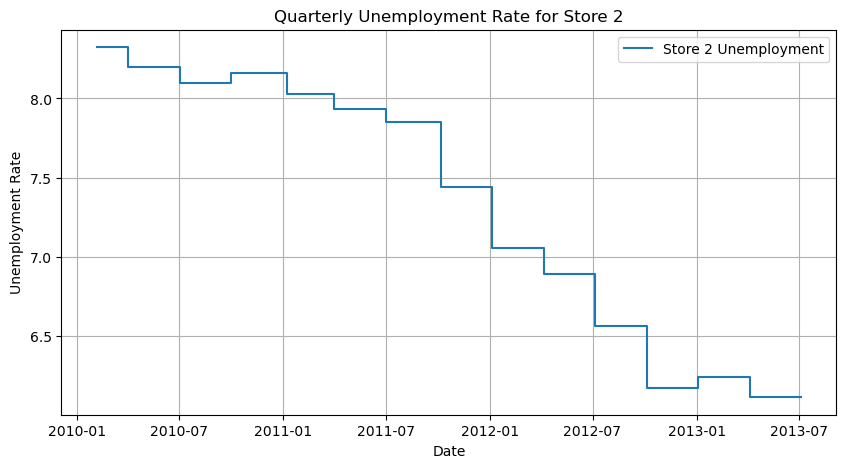

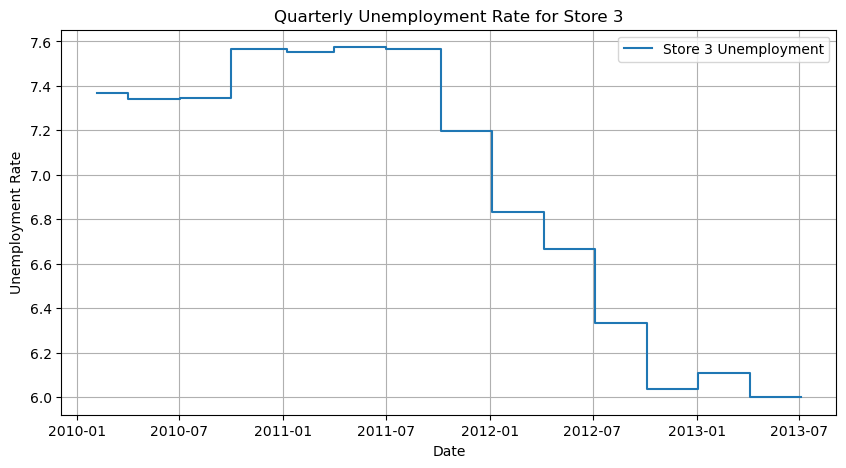

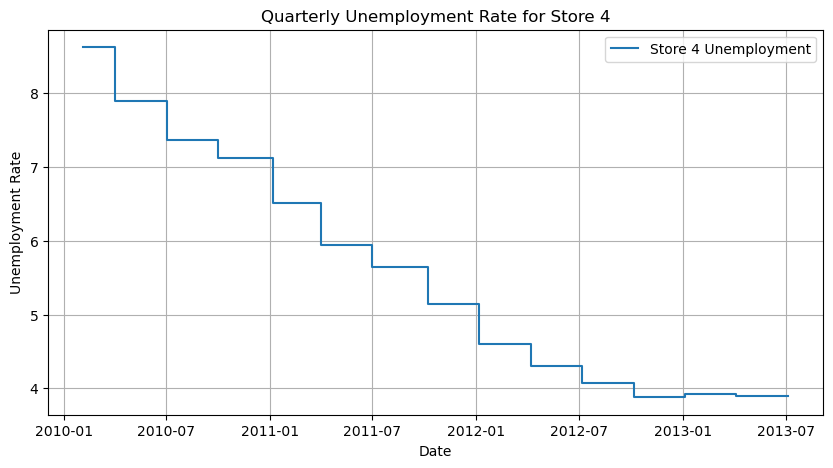

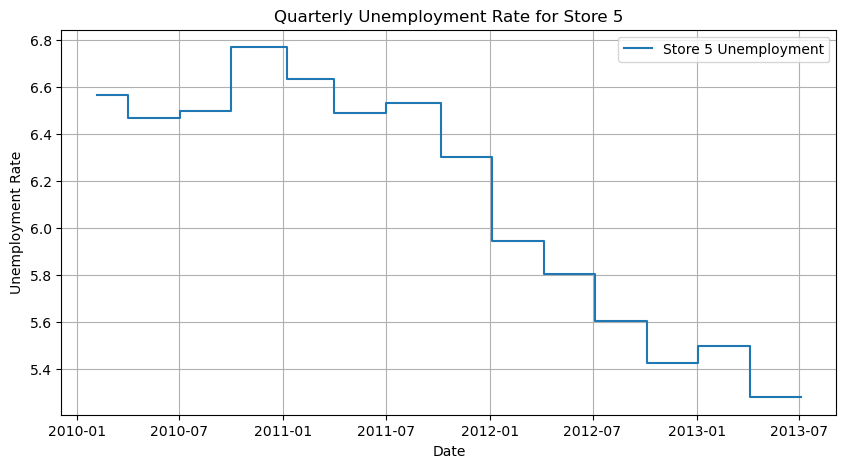

In [398]:
import matplotlib.pyplot as plt

unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])

store_ids = unemployment_df['Store'].unique()[:5]
for id in store_ids:
    store_df = unemployment_df[unemployment_df['Store'] == id].sort_values('Date')

    plt.figure(figsize=(10,5))
    plt.step(store_df['Date'], store_df['Unemployment'], where='post', label=f'Store {id} Unemployment')
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate")
    plt.title(f"Quarterly Unemployment Rate for Store {id}")
    plt.grid(True)
    plt.legend()
    plt.show()

In [399]:
filter_df=unemployment_df[((unemployment_df['Store']==1) & (unemployment_df['Date']>'2013-07-01')) & ((unemployment_df['Unemployment']<6.5) | (unemployment_df['Unemployment'].isna()))]
filter_df.shape

(4, 9)

In [400]:
4*45

180

#### This explains 2 things: 1) We now know why there are missing values in the CPI feature column (Maybe syncing issue in the data collection pipeline or CPI values not announced for the store probably happens after a certain period of time), and 2) Why there is a gap in the histogram of CPI (Some store CPI values start at around 120 and end to 130 or 140 and some stores CPI values start from around 180 and maybe goes to 190 or 220)

In [401]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])
unemployment_df = unemployment_df.sort_values(['Store', 'Date']).reset_index(drop=True)


In [402]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

def impute_unemployment_arima(store_df, target_col='Unemployment', pred_col='Unemployment_ARIMA'):
    """
    Impute missing values using ARIMA for a single store.
    Keeps original column intact, outputs new predicted column.
    """
    store_df = store_df.copy().set_index('Date')
    
    store_df[pred_col] = store_df[target_col]
    
    store_df[pred_col] = store_df[pred_col].ffill()
    
    ts_train = store_df[target_col].dropna()
    
    if store_df[target_col].isna().sum() == 0:
        return store_df.reset_index()
    
    model = ARIMA(ts_train, order=(2,0,0))
    model_fit = model.fit()
    
    for idx in store_df[store_df[target_col].isna()].index:
        pred = model_fit.predict(start=len(ts_train), end=len(ts_train))
        ts_train = pd.concat([ts_train, pd.Series([pred.iloc[0]], index=[idx])])
        store_df.at[idx, pred_col] = pred.iloc[0]
    
    return store_df.reset_index()


In [403]:
stores = unemployment_df['Store'].unique()
imputed_dfs = []

for store_id in stores:
    store_df = unemployment_df[unemployment_df['Store'] == store_id]
    imputed_store_df = impute_unemployment_arima(store_df)
    imputed_dfs.append(imputed_store_df)

df_imputed = pd.concat(imputed_dfs).sort_values(['Store', 'Date']).reset_index(drop=True)

c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packa

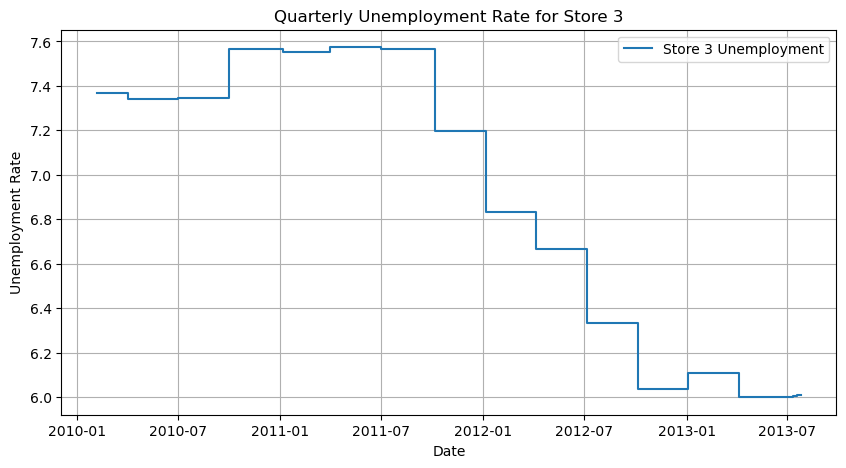

In [404]:
import matplotlib.pyplot as plt

df_imputed['Date'] = pd.to_datetime(df_imputed['Date'])

store_id = 3
store_df = df_imputed[df_imputed['Store'] == store_id].sort_values('Date')

plt.figure(figsize=(10,5))
plt.step(store_df['Date'], store_df['Unemployment_ARIMA'], where='post', label=f'Store {store_id} Unemployment')
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title(f"Quarterly Unemployment Rate for Store {store_id}")
plt.grid(True)
plt.legend()
plt.show()

In [405]:
import pandas as pd
import numpy as np

unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])

unemployment_df['Quarter'] = unemployment_df['Date'].dt.to_period('Q')

In [406]:
unemployment_df.head()

Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1 2010-02-05        42.31       2.572  211.096358         8.106   
1      1 2010-02-12        38.51       2.548  211.242170         8.106   
2      1 2010-02-19        39.93       2.514  211.289143         8.106   
3      1 2010-02-26        46.63       2.561  211.319643         8.106   
4      1 2010-03-05        46.50       2.625  211.350143         8.106   

   IsHoliday  TotalMarkDown  Unemployment_FF Quarter  
0      False            0.0            8.106  2010Q1  
1       True            0.0            8.106  2010Q1  
2      False            0.0            8.106  2010Q1  
3      False            0.0            8.106  2010Q1  
4      False            0.0            8.106  2010Q1

In [407]:
quarterly_mean = unemployment_df.groupby(['Store', 'Quarter'])['Unemployment'].mean().reset_index()

In [408]:
quarterly_mean.head()

Store Quarter  Unemployment
0      1  2010Q1         8.106
1      1  2010Q2         7.808
2      1  2010Q3         7.787
3      1  2010Q4         7.838
4      1  2011Q1         7.742

In [409]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def predict_all_quarters(store_quarter_df, degree=5):
    store_quarter_df = store_quarter_df.copy()
    store_quarter_df['Quarter_num'] = np.arange(len(store_quarter_df))

    # Training data
    train_df = store_quarter_df.dropna(subset=['Unemployment'])
    # print(train_df['Quarter_num'].values.reshape(-1,1))
    X = train_df['Quarter_num'].values.reshape(-1,1)
    # print(train_df['Unemployment'].values)
    y = train_df['Unemployment'].values

    # Polynomial fit
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    # Predict for ALL quarters in dataset
    X_all = store_quarter_df['Quarter_num'].values.reshape(-1,1)
    store_quarter_df['Predicted'] = model.predict(poly.transform(X_all))

    return store_quarter_df[['Quarter','Predicted']]

In [410]:
# --- Imputation ---
for store_id in unemployment_df['Store'].unique():
    # Quarterly-level regression predictions
    store_quarter_df = quarterly_mean[quarterly_mean['Store']==store_id]
    pred_quarters = predict_all_quarters(store_quarter_df, degree=5)

    # Map back to unemployment_df
    for _, row in pred_quarters.iterrows():
        mask = (
            (unemployment_df['Store']==store_id) &
            (unemployment_df['Quarter']==row['Quarter']) &
            (unemployment_df['Unemployment'].isna())
        )
        unemployment_df.loc[mask, 'Unemployment_pred'] = row['Predicted']


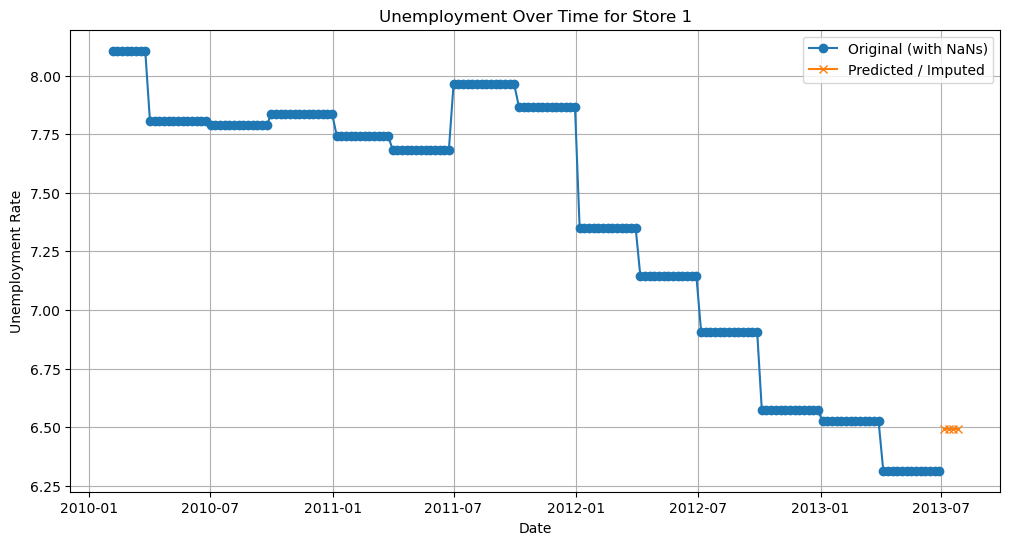

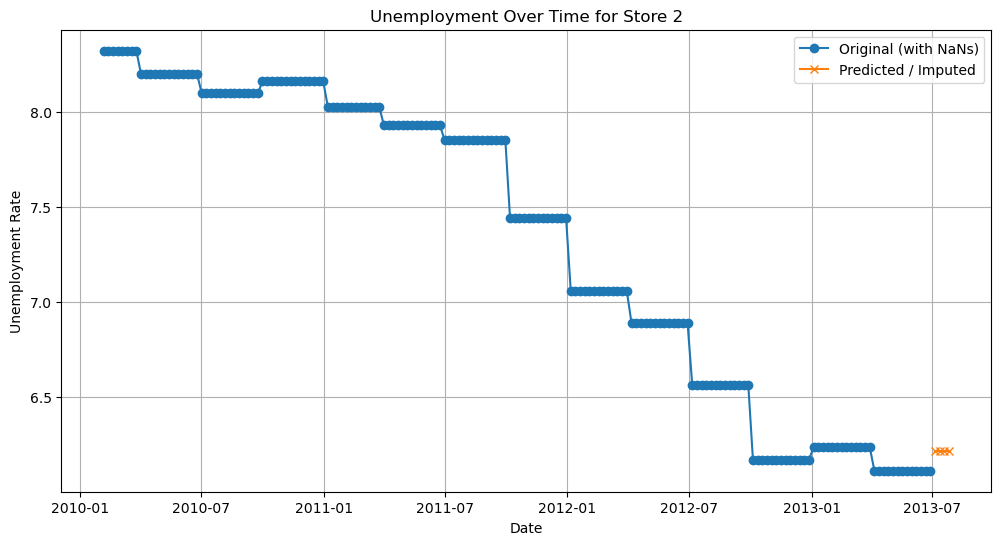

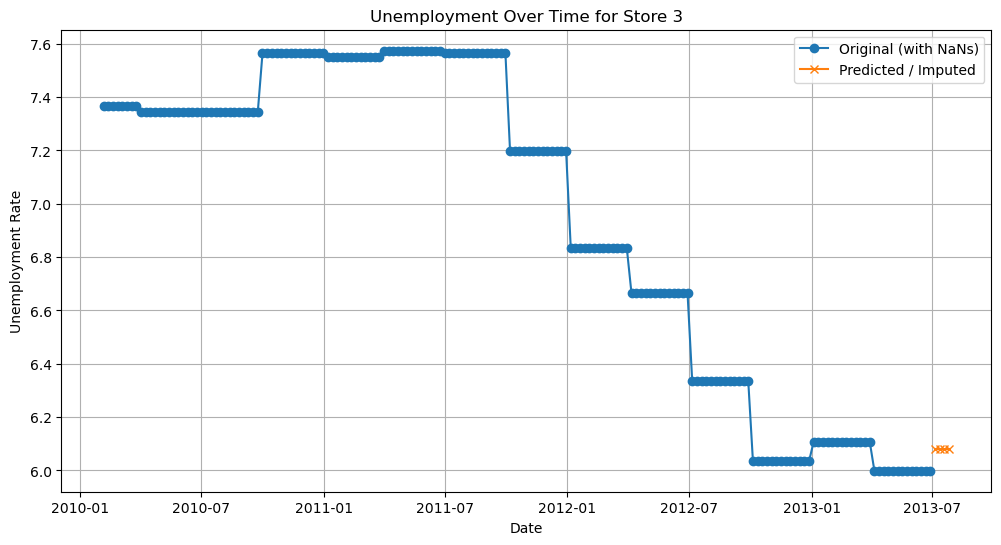

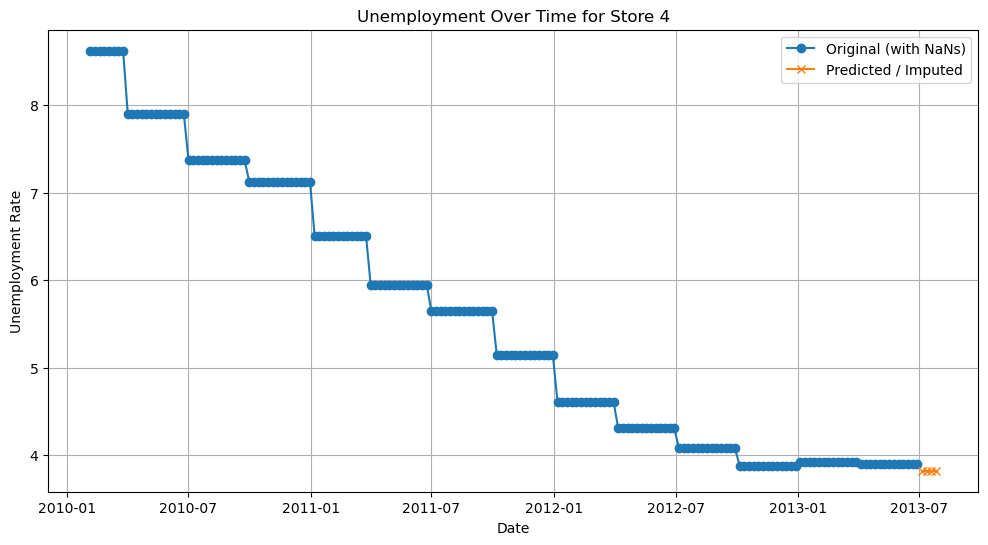

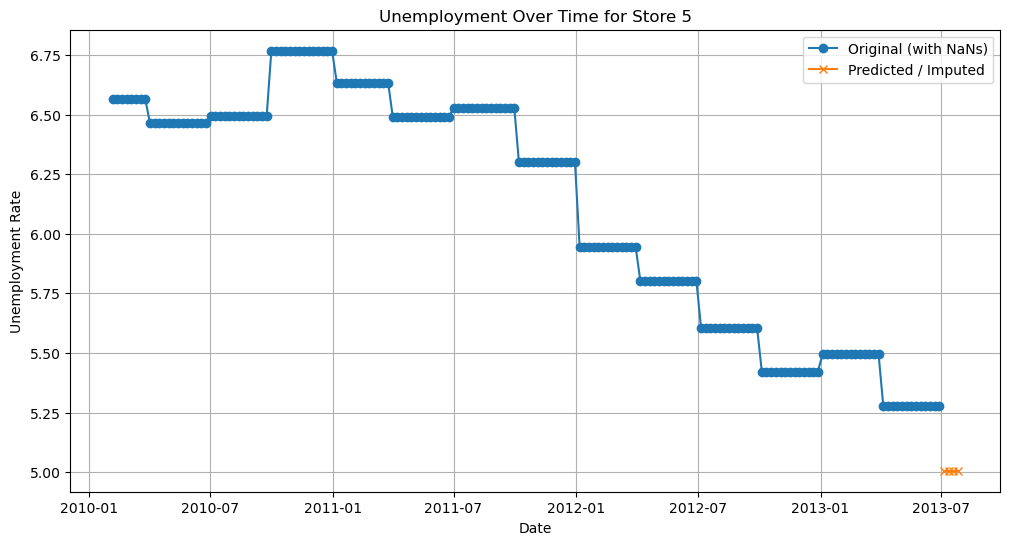

In [411]:
import matplotlib.pyplot as plt

store_ids = sorted(unemployment_df['Store'].unique()[:5])

for id in store_ids:
    store_df = unemployment_df[unemployment_df["Store"] == id]

    plt.figure(figsize=(12, 6))

    plt.plot(store_df["Date"], store_df["Unemployment"], label="Original (with NaNs)", marker="o")
    plt.plot(store_df["Date"], store_df["Unemployment_pred"], label="Predicted / Imputed", marker="x")

    plt.title(f"Unemployment Over Time for Store {id}")
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate")
    plt.legend()
    plt.grid(True)
    plt.show()


In [412]:
unemployment_df.isna().sum()

Store                   0
Date                    0
Temperature             0
Fuel_Price              0
CPI                   585
Unemployment          180
IsHoliday               0
TotalMarkDown           0
Unemployment_FF         0
Quarter                 0
Unemployment_pred    8010
dtype: int64

In [413]:
unemployment_df.notna().sum()

Store                8190
Date                 8190
Temperature          8190
Fuel_Price           8190
CPI                  7605
Unemployment         8010
IsHoliday            8190
TotalMarkDown        8190
Unemployment_FF      8190
Quarter              8190
Unemployment_pred     180
dtype: int64

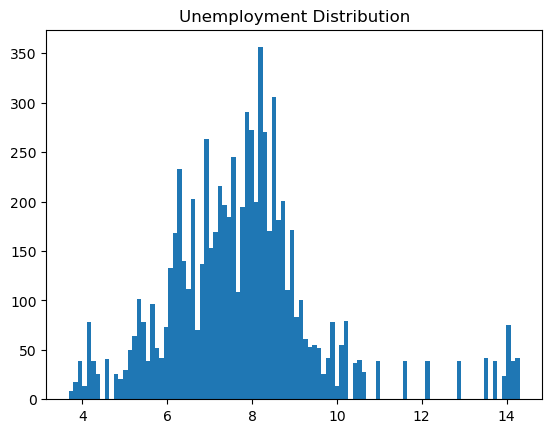

In [414]:
plt.hist(dataset_features['Unemployment'],bins=100)
plt.title("Unemployment Distribution")
plt.show()

#### We verified our whole and it is resulting in no null values once we implute the values from Unemployment_pred feature column to Unemployment feature column

#### Now its time to officially impute the predicted values to the null values of the Unemployment feature column

In [415]:
unemployment_df.head()

Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1 2010-02-05        42.31       2.572  211.096358         8.106   
1      1 2010-02-12        38.51       2.548  211.242170         8.106   
2      1 2010-02-19        39.93       2.514  211.289143         8.106   
3      1 2010-02-26        46.63       2.561  211.319643         8.106   
4      1 2010-03-05        46.50       2.625  211.350143         8.106   

   IsHoliday  TotalMarkDown  Unemployment_FF Quarter  Unemployment_pred  
0      False            0.0            8.106  2010Q1                NaN  
1       True            0.0            8.106  2010Q1                NaN  
2      False            0.0            8.106  2010Q1                NaN  
3      False            0.0            8.106  2010Q1                NaN  
4      False            0.0            8.106  2010Q1                NaN

In [416]:
unemployment_df.isna().sum()

Store                   0
Date                    0
Temperature             0
Fuel_Price              0
CPI                   585
Unemployment          180
IsHoliday               0
TotalMarkDown           0
Unemployment_FF         0
Quarter                 0
Unemployment_pred    8010
dtype: int64

In [417]:
unemployment_df=unemployment_df.sort_values(by=['Store','Date']).reset_index(drop=True)
unemployment_df['Unemployment']=unemployment_df['Unemployment'].fillna(unemployment_df['Unemployment_pred'])
unemployment_df.isna().sum()

Store                   0
Date                    0
Temperature             0
Fuel_Price              0
CPI                   585
Unemployment            0
IsHoliday               0
TotalMarkDown           0
Unemployment_FF         0
Quarter                 0
Unemployment_pred    8010
dtype: int64

In [418]:
# Make sure unemployment_df has the right columns
unemployment_merging_df = unemployment_df[['Store', 'Date', 'Unemployment_pred']]
features_stores_merged_df=features_stores_merged_df.sort_values(by=['Store','Date']).reset_index(drop=True)

# Merge predictions into features_stores_merged_df
features_stores_merged_df = features_stores_merged_df.merge(
    unemployment_merging_df,
    on=['Store', 'Date'],
    how='left'
)

# Fill missing Unemployment with predictions
features_stores_merged_df['Unemployment'] = (
    features_stores_merged_df['Unemployment']
    .fillna(unemployment_df['Unemployment'])
)

# Drop the helper column if you want
features_stores_merged_df = features_stores_merged_df.drop(columns=['Unemployment_pred'])


In [419]:
features_stores_merged_df.isna().sum()

Store            0
Date             0
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
IsHoliday        0
TotalMarkDown    0
Type             0
Size             0
dtype: int64

In [420]:
dataset_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

#### We can probably feature engineer IsHoliday feature column into respective holidays but first lets check which day is coming under the case where the stores experience holidays

In [421]:
dataset_features['Date'] = pd.to_datetime(dataset_features['Date'])
holiday_dates = dataset_features['Date']
day_names = holiday_dates.dt.day_name().unique()
print(day_names)

['Friday']


In [422]:
dataset_features['Date'] = pd.to_datetime(dataset_features['Date'])
holiday_dates = dataset_features[dataset_features['IsHoliday'] == True]['Date']
holiday_weekdays = holiday_dates.dt.day_name().unique()
print(holiday_weekdays)

['Friday']


In [423]:
dataset_features[dataset_features['IsHoliday']==True].shape

(585, 8)

In [424]:
dataset_features['Date'] = pd.to_datetime(dataset_features['Date'])
holiday_dates = dataset_features[dataset_features['IsHoliday'] == True]['Date'].dt.date.unique()
print(holiday_dates)

[datetime.date(2010, 2, 12) datetime.date(2010, 9, 10)
 datetime.date(2010, 11, 26) datetime.date(2010, 12, 31)
 datetime.date(2011, 2, 11) datetime.date(2011, 9, 9)
 datetime.date(2011, 11, 25) datetime.date(2011, 12, 30)
 datetime.date(2012, 2, 10) datetime.date(2012, 9, 7)
 datetime.date(2012, 11, 23) datetime.date(2012, 12, 28)
 datetime.date(2013, 2, 8)]


In [425]:
dataset_stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

#### Analysis of dataset_stores starts

In [426]:
dataset_stores.shape

(45, 3)

In [427]:
dataset_stores['Store'].unique().shape

(45,)

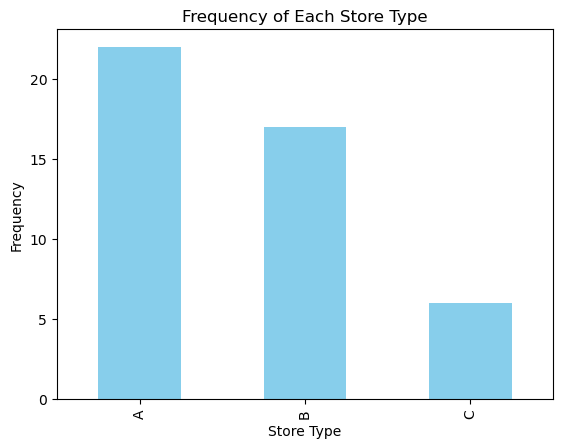

In [428]:
import matplotlib.pyplot as plt

# Count frequencies
type_counts = dataset_stores['Type'].value_counts()

# Plot
type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Store Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Store Type')
plt.show()


In [429]:
print(dataset_stores.describe())
dataset_stores.shape

           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


(45, 3)

In [430]:
dataset_stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [431]:
dataset_stores['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [432]:
len(dataset_stores['Size'].unique())

40

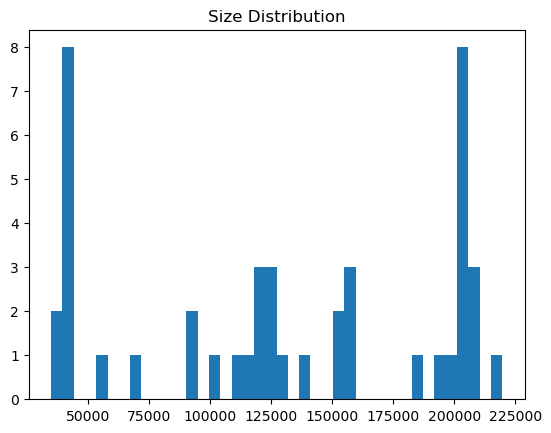

In [433]:
plt.hist(dataset_stores['Size'],bins=dataset_stores['Size'].unique().shape[0])
plt.title("Size Distribution")
plt.show()

#### Assumption: There are 2 gaps appearing in the distribution of the Size feature column(one at 75000 and another at 175000). Our assumption is that it is related to the Type feature column as it contains 3 unique values. Lets verify it

In [434]:
for val in dataset_stores['Type'].unique():
    print(f"Min and max values of Size for store type {val}:",dataset_stores[dataset_stores['Type']==val]['Size'].min(),dataset_stores[dataset_stores['Type']==val]['Size'].max())

Min and max values of Size for store type A: 39690 219622
Min and max values of Size for store type B: 34875 140167
Min and max values of Size for store type C: 39690 42988


#### The assumption was false related to type feature column acting as a bucketing column for size feature column

#### Now lets store these datasets into some files for eda and feature extraction phase

In [435]:
import os

dataset_dir=os.path.join('..','data','preprocessing')
os.makedirs(dataset_dir,exist_ok=True)

dataset_train.to_csv(os.path.join(dataset_dir,'train.csv'),index=False)
features_stores_merged_df.to_csv(os.path.join(dataset_dir,'features_stores_merged.csv'),index=False)

#### Now you can go ahead to notebooks/eda.ipynb for furthur reviewing the project